# Global Fertility Dynamics

### Project Overview

**Objective:**
This project investigates the significant global decline in fertility rates over the past four decades, with a focus on two distinct groups of countries: those with the highest fertility rates and those with the lowest. The primary goal is to explore the commonalities and differences between these groups and to analyze the relationship between fertility and key factors such as economic sectors, demographics, education, and health system. By examining these factors, the project aims to uncover the underlying causes of fertility rate disparities and assess the broader implications for economic development, social stability, and future demographic trends. Understanding these dynamics is crucial for developing strategies to address the challenges posed by declining fertility rates globally.

**Data:**
The dataset used in this analysis is sourced from the [World Bank Group](https://databank.worldbank.org/reports.aspx?source=2&series=SP.DYN.TFRT.IN&country=&_gl=1*1a5qzzn*_gcl_au*MTczNDYzNTAzLjE3MjM4MzUwNjM.#), covering 20 countries from 1984 to 2023, with a total of 8000 feature entries. The countries are divided into two groups: the 10 countries with the highest fertility rates and the 10 with the lowest.

**Conclusion:**
The analysis reveals that wealthier countries with stable political environments, higher GDP, and better health expenditure tend to have lower fertility rates. Conversely, countries with higher fertility rates often face significant challenges such as political instability, poverty, and low investment in health systems. The global decline in fertility rates underscores the need to address these disparities and prepare for potential demographic and socioeconomic challenges in the future.

### Imports and Dataset Loading 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from pmdarima import auto_arima

In [6]:
df_high = pd.read_csv('..\\M8-Final Project\\dataset\\top_10_fertility.csv')
df_low = pd.read_csv('..\\M8-Final Project\\dataset\\10_lowest_fertility.csv')

### Data Preprocessing

#### 1. Top 10 Countries with the Highest Fertility Rates

In [9]:
df_high.head(5)

,Year,Country,"Fertility rate, total (births per woman)",GDP per capita (current US$),"Inflation, consumer prices (annual %)",Urban population (% of total population),Population growth (annual %),Net migration,"Unemployment, total (% of total labor force) (national estimate)","Secondary education, pupils",Domestic general government health expenditure per capita (current US$),Domestic private health expenditure per capita (current US$)
0,1984,Niger,7.92,209.5318,8.364,14.31,3.0168,-9227,..,47188,..,..
1,1985,Niger,7.93,200.4255,-0.923,14.54,3.0193,-6141,..,47324,..,..
2,1986,Niger,7.90,257.0199,-3.208,14.76,3.0250,-2731,..,47145,..,..
3,1987,Niger,7.87,292.4088,-6.712,14.99,3.0342,-2347,..,52478,..,..
4,1988,Niger,7.84,289.6701,-1.394,15.21,3.0393,-1148,..,58489,..,..


In [10]:
df_high.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Year                                                                     400 non-null    int64  
 1   Country                                                                  400 non-null    object 
 2   Fertility rate, total (births per woman)                                 400 non-null    float64
 3   GDP per capita (current US$)                                             400 non-null    object 
 4   Inflation, consumer prices (annual %)                                    400 non-null    object 
 5   Urban population (% of total population)                                 400 non-null    float64
 6   Population growth (annual %)                                             4

In [11]:
df_high.columns

Index(['Year', 'Country', 'Fertility rate, total (births per woman)',
       'GDP per capita (current US$)', 'Inflation, consumer prices (annual %)',
       'Urban population (% of total population)',
       'Population growth (annual %)', 'Net migration',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Secondary education, pupils',
       'Domestic general government health expenditure per capita (current US$)',
       'Domestic private health expenditure per capita (current US$)'],
      dtype='object')

In [12]:
# Create a copy
df1 = df_high.copy()

# Create a boolean DataFrame where True indicates the value is '..'
bool_df = df1 == '..'

# Sum the True values in each column to get the count of '..' in each column
count_of_dots = bool_df.sum()

# Display the result
print(count_of_dots)

Year                                                                         0
Country                                                                      0
Fertility rate, total (births per woman)                                     0
GDP per capita (current US$)                                                35
Inflation, consumer prices (annual %)                                      117
Urban population (% of total population)                                     0
Population growth (annual %)                                                 0
Net migration                                                                0
Unemployment, total (% of total labor force) (national estimate)           346
Secondary education, pupils                                                146
Domestic general government health expenditure per capita (current US$)    201
Domestic private health expenditure per capita (current US$)               201
dtype: int64


In [13]:
# Define a function to replace '..' with NaN, convert to numeric
def replace_and_convert_to_nan(df, columns=None):
    for column in columns:
        # Replace '..' with NaN
        df[column] = df[column].replace('..', np.nan)

        # Convert specified column to numeric
        df[column] = pd.to_numeric(df[column])
    return df

df1 = replace_and_convert_to_nan(df1, columns=['GDP per capita (current US$)',
                                               'Inflation, consumer prices (annual %)',
                                               'Unemployment, total (% of total labor force) (national estimate)',
                                               'Secondary education, pupils',
                                               'Domestic general government health expenditure per capita (current US$)',
                                               'Domestic private health expenditure per capita (current US$)'])

In [14]:
# Check the consistence of dataframe
df1.isna().sum()

Year                                                                         0
Country                                                                      0
Fertility rate, total (births per woman)                                     0
GDP per capita (current US$)                                                35
Inflation, consumer prices (annual %)                                      117
Urban population (% of total population)                                     0
Population growth (annual %)                                                 0
Net migration                                                                0
Unemployment, total (% of total labor force) (national estimate)           346
Secondary education, pupils                                                146
Domestic general government health expenditure per capita (current US$)    201
Domestic private health expenditure per capita (current US$)               201
dtype: int64

In [15]:
# Define an impute function to fill in missing data
def impute_missing_data_by_group(df, group_column, strategy='mode', columns=None, value=None, countries=None):
    
    for country in countries:
        for column in columns:
            if strategy == 'mean':
                # Impute using mean within each group
                mean_value = df.loc[df[group_column] == country, column].mean()
                df.loc[df[group_column] == country, column] = df.loc[df[group_column] == country, column].fillna(mean_value)
                
            elif strategy == 'median':
                # Impute using median within each group
                median_value = df.loc[df[group_column] == country, column].median()
                df.loc[df[group_column] == country, column] = df.loc[df[group_column] == country, column].fillna(median_value)
                
            elif strategy == 'mode':
                # Impute using mode within each group
                mode_series = df.loc[df[group_column] == country, column].mode()
                mode_value = mode_series[0] if not mode_series.empty else None
                df.loc[df[group_column] == country, column] = df.loc[df[group_column] == country, column].fillna(mode_value)
                

    return df


In [16]:
# Define a function to handle specific imputation requirements
def impute_missing_data_by_custom_group(df, group_column, columns, custom_values):
    for column in columns:
        for group, value_dict in custom_values.items():
            # Check if the group exists in the DataFrame
            if group in df[group_column].unique():
                # Impute missing values in the specified column for the given group
                impute_value = value_dict.get(column, np.nan)  # Default to NaN if no specific value provided
                df.loc[(df[group_column] == group) & (df[column].isna()), column] = impute_value

    return df

#### 1.1 Handle Missing Value in GDP per capita

In [18]:
filtered_gdp = df1[df1['GDP per capita (current US$)'].isna()]['Country']
print(filtered_gdp.value_counts())

Country
South Sudan         27
Congo, Dem. Rep.     8
Name: count, dtype: int64


In [19]:
custom_values_high_1 = {
    'South Sudan': {'GDP per capita (current US$)': 0},
    'Congo, Dem. Rep.': {'GDP per capita (current US$)': 230.8785}
}

# Impute missing data with custom values
df1 = impute_missing_data_by_custom_group(df1, group_column='Country', 
                                          columns=['GDP per capita (current US$)'], 
                                          custom_values=custom_values_high_1)

- South Sudan gained independence from Sudan in 2011, is the world's newest country, so in GDP column, there are 27 missing values, will fill in with 0.
- Congo, Dem. Rep has missing values from year 1984 to year 1991, according to the metadata from worldbank group, Congo, Dem. Rep starts to use the System of National Accounts methodology in 1993, then will fill GDP per capita value from 1993 of 230.8757 in the missing rows.

#### 1.2 Handle Missing Value in Inflation, consumer prices

In [22]:
filtered_inflation = df1[df1['Inflation, consumer prices (annual %)'].isna()]['Country']
print(filtered_inflation.value_counts())

Country
Somalia             40
South Sudan         25
Guinea              21
Uganda              10
Benin                9
Congo, Dem. Rep.     7
Mali                 5
Name: count, dtype: int64


In [23]:
custom_values_high_2 = {'Somalia': {'Inflation, consumer prices (annual %)': 0},
                 'South Sudan': {'Inflation, consumer prices (annual %)': 0},
                 'Uganda': {'Inflation, consumer prices (annual %)': 10},
                 'Benin': {'Inflation, consumer prices (annual %)': 0.4},
                 'Congo, Dem. Rep.': {'Inflation, consumer prices (annual %)': 2.886},
                 'Mali': {'Inflation, consumer prices (annual %)': -0.1}
}

# Impute missing data with custom values
df1 = impute_missing_data_by_custom_group(df1, group_column='Country', 
                                          columns=['Inflation, consumer prices (annual %)'], 
                                          custom_values=custom_values_high_2)


# Impute missing data with averge inflation for country Guinea
countries_high_1 = ['Guinea']

df1 = impute_missing_data_by_group(df1, group_column='Country', 
                                   strategy='mean', 
                                   columns=['Inflation, consumer prices (annual %)'], 
                                   countries=countries_high_1)

- According to worldbank metadata, Somalia's National Accounts base year is from year 2022, so for the entire time span, there are no records in Inflation column, fill with 0.
- South Sudan gained independece from Sudan in year 2011, and National Accounts base year is from year 2009, so before year 2009, there are no records in Inflation column, fill with 0.
- Guinea's National Accounts base year is from year 2008, fill in the missing values with average inflation rate.
- Uganda has missing value from year 1984 to year 1993, the latest industrial data is from year 2000, it's National Accounts base year is from 2017, and use the 2008 System of National Accounts methodology, fill with the value 10 from year 1994.
- Benin has missing value from year 1984 to year 1992, it's National Accounts base year is year 2015, latest industrial data is year 1981, fill with the value 0.4 from year 1993.
- Congo, Dem. Rep. has missing value from year 2017 to year 2023, it's National Accounts base year is 2005, it's survey years are 2011, 2017, and 2021, fill the missing value with 2.9 from year 2016.
- Mali has missing values from year 1984 to year 1988, it's National Accounts base year is year 1999, fill the missing value with -0.1 from year 1989.

#### 1.3 Handle Missing Value in Unemployment

In [26]:
filtered_unemployment = df1[df1['Unemployment, total (% of total labor force) (national estimate)'].isna()]['Country']
print(filtered_unemployment.value_counts())

Country
Somalia             39
South Sudan         39
Chad                38
Guinea              38
Congo, Dem. Rep.    37
Burundi             34
Benin               33
Niger               32
Mali                28
Uganda              28
Name: count, dtype: int64


In [27]:
# Average Unemployment rate in these 10 countries
df1['Unemployment, total (% of total labor force) (national estimate)'].mean()

3.7644444444444445

- These top 10 countries with highest fertility rates are located in Africa, they are either in low income group or lower middle income group. Countries such as South Sudan, it's struggled with corruption and political conflict, is one of the poorest countries, and less than 20% of people living in urban areas. Country such as Burundi, 90% of the population relies on subsistence agriculture. Chad's major problem is wide poverty and high risk of floods. According to worldbank metadata, in many cases it is especially difficult to measure employment and unemployment in agriculture, then given that 346 out of 400 entries with missing value in Unemployment Column, it's not sufficient to analyze based on the information.

In [29]:
# Drop the entire unemployment column 
df1 = df1.drop(columns=['Unemployment, total (% of total labor force) (national estimate)'])

#### 1.4 Handle Missing Value in Secondary education

In [31]:
filtered_edu = df1[df1['Secondary education, pupils'].isna()]['Country']
print(filtered_edu.value_counts())

Country
Somalia             34
South Sudan         27
Benin               22
Congo, Dem. Rep.    21
Uganda              12
Mali                 8
Burundi              7
Niger                6
Chad                 5
Guinea               4
Name: count, dtype: int64


In [32]:
custom_values_high_3 = {'South Sudan': {'Secondary education, pupils': 0}}

# Impute missing data with custom values
df1 = impute_missing_data_by_custom_group(df1, group_column='Country', 
                                          columns=['Secondary education, pupils'], 
                                          custom_values=custom_values_high_3)

- South Sudan gained independece from Sudan in year 2011, there are no records in Secondary education before year 2011, fill with 0.

In [34]:
# Impute mean value in each country
countries_high_2 = ['Somalia', 'Benin', 
             'Congo, Dem. Rep.', 
             'Uganda', 'Guinea', 'Niger', 
             'Burundi', 'Chad', 'Mali']

df1 = impute_missing_data_by_group(df1, group_column='Country', 
                                   strategy='mean', 
                                   columns=['Secondary education, pupils'], 
                                   countries=countries_high_2)

- According to worldbank metadata, school enrollment includes Individuals officially registered in a given educational program, or stage or module thereof, regardless of age. In some countries the school year spans two calendar years (for example, from September 2010 to June 2011), therefore, in these cases, the reference year refers to the year in which the school year ended(2011 in the example).
- Niger has the missing value from year 2018 to year 2023.
- Congo, Demo. Rep. has 4 durations of missing value, first one is from year 1989 to year 1991; second one is from year 1996 to year 2006; thrid one is from year 2016 to year 2020; the fourth one is from year 2022 to year 2023.
- Mali has 5 durations of missing value, first one is at year 1986; second one is from year 2001 to year 2002; third one is year 2012; fourth one is at year 2019; the last one is from year 2021 to year 2023.
- Benin also has 5 durations of missing value, first one is from year 1988 to year 1989; second one is from 2005 to 2010; third one is year 2012; the fourth one is from year 2017 to year 2019; the last one is at year 2023.
- Chad has 2 durations of missing value, first one is from year 1991 to year 1993; the second one is from year 2022 to year 2023.
- Uganda has 2 durations of missing value, first one is from year 1997 to year 2003; the second one is from year 2018 to year 2023.
- Somalia only has 6 entries of secondary enrollment.
- Burundi has missing value from year 1994 to year 2000.
- Guinea has two durations of missing values, first one is from year 1997 to year 1998; second one is from year2009 to 2010.

In [36]:
print(df1['Secondary education, pupils'].isna().sum())

0


#### 1.5 Handle Missing Value in Domestic General Health Expenditure

In [38]:
filtered_general_health = df1[df1['Domestic general government health expenditure per capita (current US$)'].isna()]['Country']
print(filtered_general_health.value_counts())

Country
Somalia             40
South Sudan         33
Niger               16
Congo, Dem. Rep.    16
Mali                16
Benin               16
Chad                16
Uganda              16
Burundi             16
Guinea              16
Name: count, dtype: int64


In [39]:
# Replace all nan with 0
df1['Domestic general government health expenditure per capita (current US$)'] = df1['Domestic general government health expenditure per capita (current US$)'].replace(np.nan, 0)

- According to worldbank metadata, the health expenditure estimates have been prepared by the World Health Organization under the framework of the System of Health Accounts 2011 (SHA 2011).
- Somalia has no records for the entire time span
- South Sudan only have the records from year 2017 to year 2023.
- The rest countries' records are from year 2000 to year 2023.

#### 1.6 Handle Missing Value in Domestic Private Health Expenditure

In [42]:
filtered_private_health = df1[df1['Domestic private health expenditure per capita (current US$)'].isna()]['Country']
filtered_private_health.value_counts()

Country
Somalia             40
South Sudan         33
Niger               16
Congo, Dem. Rep.    16
Mali                16
Benin               16
Chad                16
Uganda              16
Burundi             16
Guinea              16
Name: count, dtype: int64

In [43]:
# Replace all nan with 0
df1['Domestic private health expenditure per capita (current US$)'] = df1['Domestic private health expenditure per capita (current US$)'].replace(np.nan, 0)

- According to worldbank metadata, the health expenditure estimates have been prepared by the World Health Organization under the framework of the System of Health Accounts 2011 (SHA 2011).
- Somalia has no records for the entire time span
- South Sudan only have the records from year 2017 to year 2023.
- The rest countries' records are from year 2000 to year 2023.

- The health expenditure estimates have been prepared by the World Health Organization under the framework of the System of Health Accounts 2011 (SHA 2011). 

#### 2. Top 10 Countries with the Lowest Fertility Rates

In [47]:
df_low.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Year                                                                     400 non-null    int64  
 1   Country                                                                  400 non-null    object 
 2   Fertility rate, total (births per woman)                                 400 non-null    float64
 3   GDP per capita (current US$)                                             400 non-null    object 
 4   Inflation, consumer prices (annual %)                                    400 non-null    object 
 5   Urban population (% of total population)                                 400 non-null    float64
 6   Population growth (annual %)                                             4

In [48]:
# Create a copy
df2 = df_low.copy()

# Create a boolean DataFrame where True indicates the value is '..'
bool_df_2 = df2 == '..'

# Sum the True values in each column to get the count of '..' in each column
count_of_dots_2 = bool_df_2.sum()

# Display the result
print(count_of_dots_2)

Year                                                                         0
Country                                                                      0
Fertility rate, total (births per woman)                                     0
GDP per capita (current US$)                                                21
Inflation, consumer prices (annual %)                                       90
Urban population (% of total population)                                     0
Population growth (annual %)                                                 0
Net migration                                                                0
Unemployment, total (% of total labor force) (national estimate)            76
Secondary education, pupils                                                 89
Domestic general government health expenditure per capita (current US$)    184
Domestic private health expenditure per capita (current US$)               184
dtype: int64


In [49]:
# Replace '..' with NaN and convert to numeric
df2 = replace_and_convert_to_nan(df2, columns=['GDP per capita (current US$)',
                                               'Inflation, consumer prices (annual %)',
                                               'Unemployment, total (% of total labor force) (national estimate)',
                                               'Secondary education, pupils',
                                               'Domestic general government health expenditure per capita (current US$)',
                                               'Domestic private health expenditure per capita (current US$)'])

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Year                                                                     400 non-null    int64  
 1   Country                                                                  400 non-null    object 
 2   Fertility rate, total (births per woman)                                 400 non-null    float64
 3   GDP per capita (current US$)                                             379 non-null    float64
 4   Inflation, consumer prices (annual %)                                    310 non-null    float64
 5   Urban population (% of total population)                                 400 non-null    float64
 6   Population growth (annual %)                                             4

#### 2.1 Handle Missing Value in GDP per capita

In [52]:
filtered_gdp_2 = df2[df2['GDP per capita (current US$)'].isna()]['Country']
print(filtered_gdp_2.value_counts())

Country
Moldova                   6
Poland                    6
Bosnia and Herzegovina    6
Ukraine                   3
Name: count, dtype: int64


- Ukraine has missing value from year 1984 to 1985, fill with the value 1265.3727 from year 1987.
- Moldova has missing value from year 1984 to year 1989, fill with the value 1204.0716 from year 1990.
- Poland has missing value from year 1984 to year 1989, fill with the value 1731.2095 from year 1990.
- Bosnia and Herzegovina has missing value from year 1984 to year 1989, fill with the value 1725.1766 from year 1990. 

In [54]:
custom_values_high_1 = {'Ukraine': {'GDP per capita (current US$)': 1265.3727},
                 'Moldova': {'GDP per capita (current US$)': 1204.0716},
                 'Poland': {'GDP per capita (current US$)': 1731.2095},
                 'Bosnia and Herzegovina': {'GDP per capita (current US$)': 1725.1766}
}

# Impute missing data with custom values
df2 = impute_missing_data_by_custom_group(df2, group_column='Country', 
                                          columns=['GDP per capita (current US$)'], 
                                          custom_values=custom_values_high_1)

In [55]:
df2['GDP per capita (current US$)'].isna().sum()

0

#### 2.2 Handle Missing Value in Inflation, consumer prices (annual %)

In [57]:
filtered_inflation_2 = df2[df2['Inflation, consumer prices (annual %)'].isna()]['Country']
print(filtered_inflation_2.value_counts())

Country
Puerto Rico               40
Bosnia and Herzegovina    33
Ukraine                    9
Moldova                    8
Name: count, dtype: int64


- Puerto Rico has no records in inflation, fill missing value with 0
- Bosnia and Herzegovina has value only from year 2006 to year 2012, fill missing value with 0.
- Moldova has missing value from year 1984 to year 1991, fill missing value with 0.
- Ukraine has missing value from year 1984 to year 1992, fill missing value with 0.
- Countries such as Ukraine and Moldova has an abnormal inflation rate in year 1993. 

In [59]:
df2['Inflation, consumer prices (annual %)'] = df2['Inflation, consumer prices (annual %)'].replace(np.nan, 0)

#### 2.3 Handle Missing Value in Unemployment

In [61]:
filtered_unemployment_2 = df2[df2['Unemployment, total (% of total labor force) (national estimate)'].isna()]['Country']
print(filtered_unemployment_2.value_counts())

Country
Bosnia and Herzegovina    20
Mauritius                 17
Moldova                   15
Ukraine                   13
Poland                     8
Puerto Rico                2
Singapore                  1
Name: count, dtype: int64


- Singapore has missing value for year 2023, fill with 3.59 in year 2022
- Ukraine has missing value from year 1984 to 1994 and from year 2022 to year 2023, fill with average unemployment.
- Moldova has missing value from year 1984 to 1998, there is an abnormal value in year 1999, fill with the mode.
- Puerto Rico has two missing value in year 2020 and year 2023, fill with value 6 in year 2022.
- Poland has missing value from year 1984 to year 1991, fill with average unemployment.
- Mauritius has missing value from year 1984 to year 2000, and year in 2023, fill with average unemployment.
- Bosnia and Herzegovina has missing value from year 1984 to year 2006, fill with average unemployment.

In [63]:
custom_values_high_2 = {'Singapore': {'Unemployment, total (% of total labor force) (national estimate)': 3.59},
                 'Puerto Rico':{'Unemployment, total (% of total labor force) (national estimate)': 6}}

# Impute missing data with custom values
df2 = impute_missing_data_by_custom_group(df2, group_column='Country', 
                                          columns=['Unemployment, total (% of total labor force) (national estimate)'], 
                                          custom_values=custom_values_high_2)

In [64]:
# Impute mean value in each country
countries_high_1 = ['Ukraine', 'Poland', 'Mauritius', 'Bosnia and Herzegovina']

df2 = impute_missing_data_by_group(df2, group_column='Country', 
                                   strategy='mean', 
                                   columns=['Unemployment, total (% of total labor force) (national estimate)'], 
                                   countries=countries_high_1)

In [65]:
# Impute mode value in each country
countries_high_2 =['Moldova']

df2 = impute_missing_data_by_group(df2, group_column='Country', 
                                   strategy='mean', 
                                   columns=['Unemployment, total (% of total labor force) (national estimate)'], 
                                   countries=countries_high_2)

In [66]:
df2['Unemployment, total (% of total labor force) (national estimate)'].isna().sum()

0

#### 2.4 Handle Missing Value in Secondary education, pupils

In [68]:
filtered_edu_2 = df2[df2['Secondary education, pupils'].isna()]['Country']
print(filtered_edu_2.value_counts())

Country
Puerto Rico               31
Bosnia and Herzegovina    23
Singapore                 13
Moldova                    7
Ukraine                    6
Mauritius                  3
Italy                      2
Spain                      2
Korea, Rep.                1
Poland                     1
Name: count, dtype: int64


- Korea, Rep. has missing value in year 2023, fill with value 2631966 from year 2023.
- Singapore has missing value from year 1996 to year 2006, and from year 2022 to 2023, fill with the average education ppl.
- Ukraine has missing value from year 1987 to year 1990, and from year 1995 to year 1999, fill with the average education ppl.
- Moldova has missing value from year 1984 to year 1989, and year 1998, fill with the average education ppl.
- Puerto Rico has missing value from year 1984 to year 2008, and from year 2017 to year 2023, fill with the average education ppl.
- Italy has missing value from year 2022 to year 2023, fill with value 4649000 from year 2021.
- Spain has missing value from year 2022 to year 2023, fill with value 3607350 from year 2021.
- Poland has missing value in year 2023, fill with value 3225700 from year 2023.
- Mauritius has missing from year 2021 to year 2023, fill with value 114124 from year 2020.
- Bosnia and Herzegovina has missing value from year 1984 to year 2006, fill with average education ppl.

In [70]:
# Impute mean value in each country
countries_edu = ['Singapore', 'Ukraine', 'Moldova',
                 'Puerto Rico','Bosnia and Herzegovina']

df2 = impute_missing_data_by_group(df2, group_column='Country', 
                                   strategy='mean', 
                                   columns=['Secondary education, pupils'], 
                                   countries=countries_edu)

In [71]:
custom_values_high_3 = {'Korea, Rep.': {'Secondary education, pupils': 2631966},
                 'Italy':{'Secondary education, pupils': 4649000},
                 'Spain':{'Secondary education, pupils': 3607350},
                 'Poland':{'Secondary education, pupils': 3225700},
                 'Mauritius': {'Secondary education, pupils': 114124}
                }


# Impute missing data with custom values
df2 = impute_missing_data_by_custom_group(df2, group_column='Country', 
                                          columns=['Secondary education, pupils'], 
                                          custom_values=custom_values_high_3)

#### 2.5 Handle Missing Value in Domestic general government health expenditure

In [73]:
filtered_general_2 = df2[df2['Domestic general government health expenditure per capita (current US$)'].isna()]['Country']
print(filtered_general_2.value_counts())

Country
Puerto Rico               40
Korea, Rep.               16
Singapore                 16
Ukraine                   16
Moldova                   16
Italy                     16
Spain                     16
Poland                    16
Mauritius                 16
Bosnia and Herzegovina    16
Name: count, dtype: int64


- Puerto Rico has no records in general health expenditure, fill with 0.
- The rest of countries only start to have value from year 2000, fill with 0.

In [75]:
df2['Domestic general government health expenditure per capita (current US$)'] = df2['Domestic general government health expenditure per capita (current US$)'].replace(np.nan, 0)

#### 2.6 Handle Missing Value in Domestic private health expenditure

In [77]:
filtered_private_2 = df2[df2['Domestic private health expenditure per capita (current US$)'].isna()]['Country']
print(filtered_private_2.value_counts())

Country
Puerto Rico               40
Korea, Rep.               16
Singapore                 16
Ukraine                   16
Moldova                   16
Italy                     16
Spain                     16
Poland                    16
Mauritius                 16
Bosnia and Herzegovina    16
Name: count, dtype: int64


- Puerto Rico has no records in general health expenditure, fill with 0.
- The rest of countries only start to have value from year 2000, fill with 0

In [79]:
df2['Domestic private health expenditure per capita (current US$)'] = df2['Domestic private health expenditure per capita (current US$)'].replace(np.nan, 0)

In [80]:
df2['Domestic private health expenditure per capita (current US$)'].isna().sum()

0

### Data Visualization 

The top 10 countries with highest fertility rates in this analysis are grouped into three distinct regions: Western Africa (Niger, Mali, Benin, Guinea), Central Africa (Congo Dem. Rep., Chad, Burundi), and East Central Africa (Uganda, South Sudan, Somalia). The visualizations that follow will provide a comprehensive overview of the fertility trends in these regions, highlighting the similarities and differences that characterize these countries.

#### 1. Top 10 Countries with highest fertility rates 

In [84]:
df1['Country'].unique()

array(['Niger', 'Congo, Dem. Rep.', 'Mali', 'Benin', 'Chad', 'Uganda',
       'Somalia', 'South Sudan', 'Burundi', 'Guinea'], dtype=object)

In [85]:
# Filter the df for Western Africa Countries
df_west_africa = df1[df1['Country'].isin(['Niger', 'Mali', 'Benin', 'Guinea'])]

# Filter the df for Central Africa Countries 
df_central_africa = df1[df1['Country'].isin(['Congo, Dem. Rep.','Chad', 'Burundi'])]

# Filter the df for East Central Africa Countries 
df_east_central_africa = df1[df1['Country'].isin(['Uganda', 'Somalia', 'South Sudan'])]

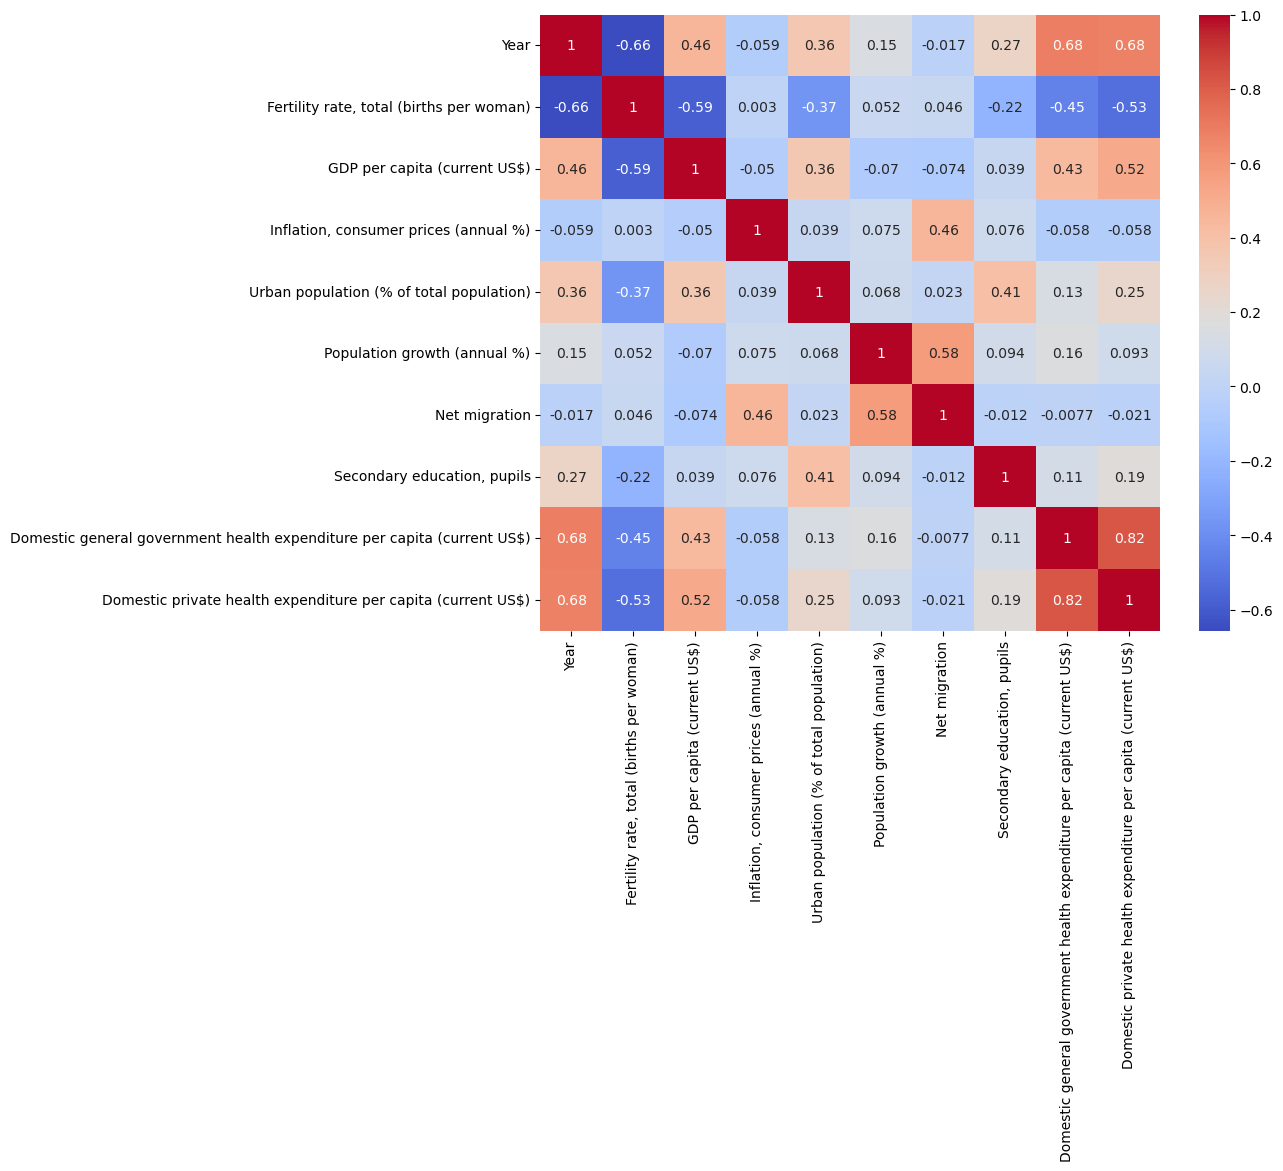

In [86]:
# Correaltion matrix of high fertility countries
corr_matrix = df1.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- The Fertility rate has a strong negative correlation with Year (-0.68), with time goes by, the fertility rate goes down.
- The Fertility rate has a strong negative correlation with GDP per capita, with a coefficient of -0.59.
- The Fertility rate also shows a moderate negative correlation with Health expenditure, both General health (-0.45) and Private health (-0.53).
- GDP per capita has a moderate positive correlation with Health Expenditure (General health: 0.7; Private health: 0.83).
- Population Growth has a strong positive correlation with Net Migration, with a coefficient of 0.58.
- Urban Population has a moderate positive correlation with Secondary Education, with a coefficient of 0.41.
- Inflation has a moderate positive correlation with Net Migration, with a coefficient of 0.46.

#### 1.1 Fertility rate Trends

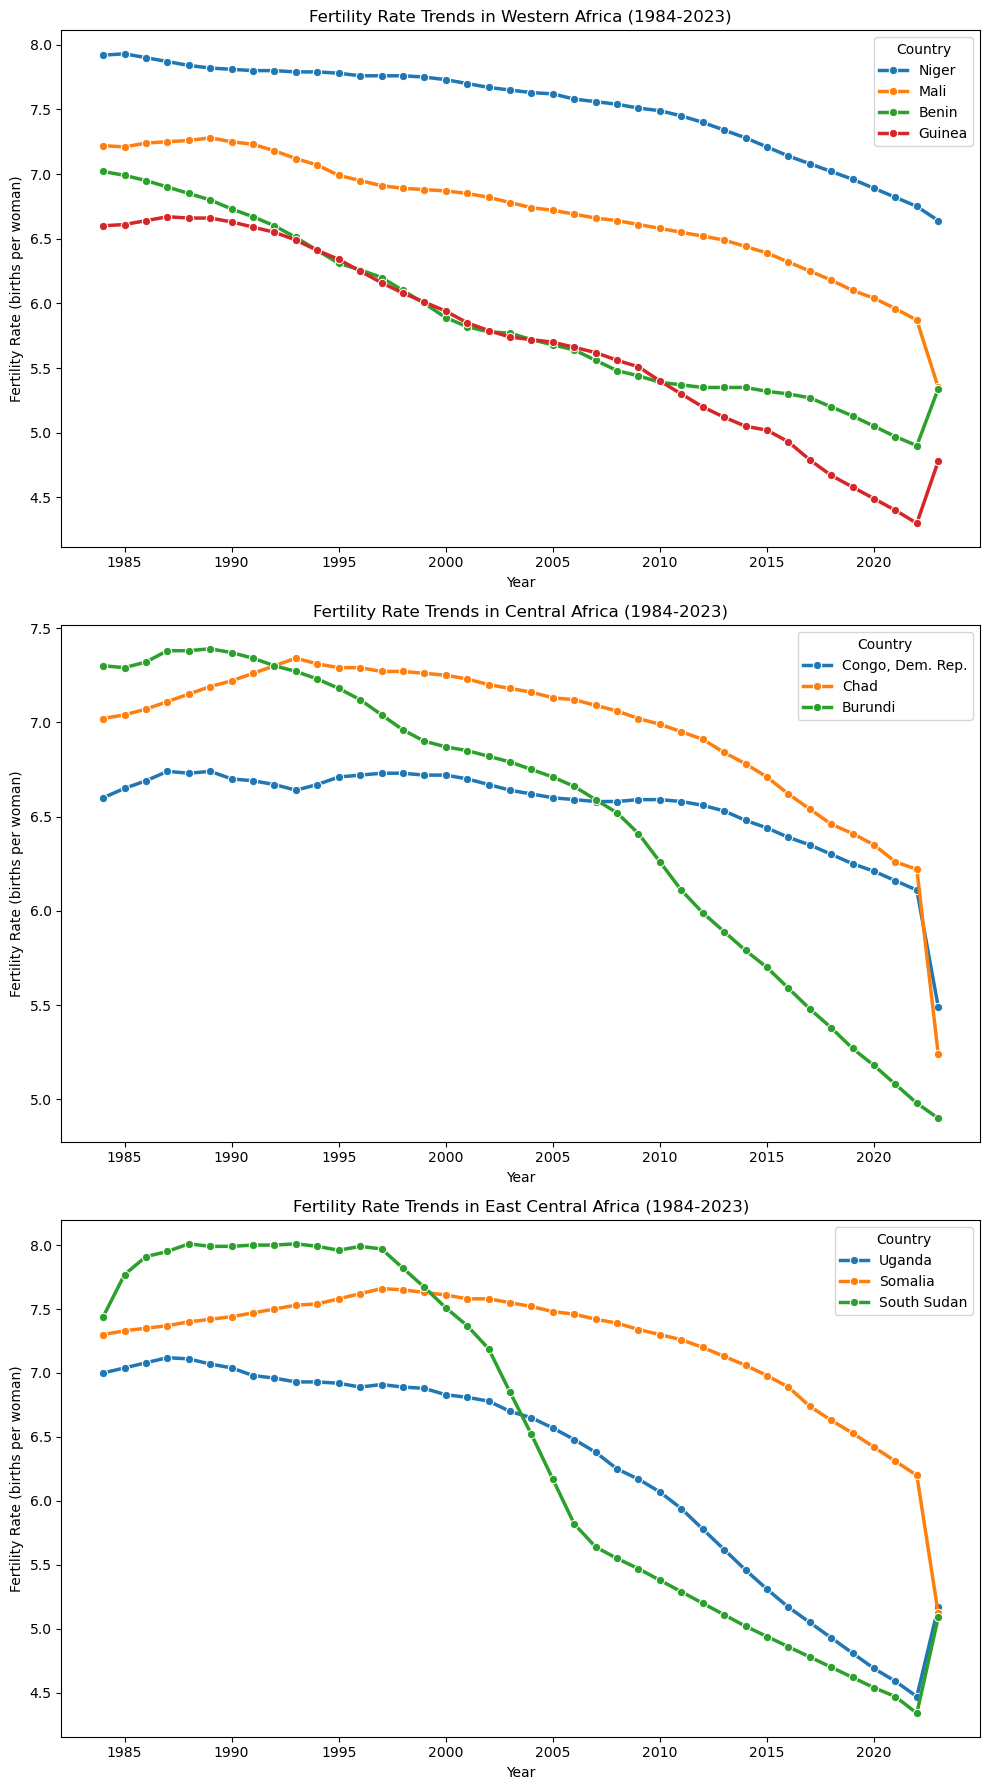

In [89]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))
# Plot for Western Africa
sns.lineplot(data=df_west_africa, 
             x='Year', 
             y='Fertility rate, total (births per woman)', 
             hue='Country', 
             marker='o',
             linewidth=2.5,
             ax=axs[0])

axs[0].set_title('Fertility Rate Trends in Western Africa (1984-2023)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Fertility Rate (births per woman)')


# Plot for Central Africa
sns.lineplot(data=df_central_africa, 
             x='Year', 
             y='Fertility rate, total (births per woman)', 
             hue='Country', 
             marker='o', 
             linewidth=2.5, 
             ax=axs[1])

axs[1].set_title('Fertility Rate Trends in Central Africa (1984-2023)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Fertility Rate (births per woman)')


# Plot for East Central Africa
sns.lineplot(data=df_east_central_africa, 
             x='Year', 
             y='Fertility rate, total (births per woman)', 
             hue='Country', 
             marker='o', 
             linewidth=2.5, 
             ax=axs[2])

axs[2].set_title('Fertility Rate Trends in East Central Africa (1984-2023)')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Fertility Rate (births per woman)')


plt.tight_layout()
plt.show()

- Overall, the fertility rate in these top 10 countries shows a decreasing trend, remaining within the range of 4.5 to 8 children per woman.

#### 1.2 GDP per capita Trends

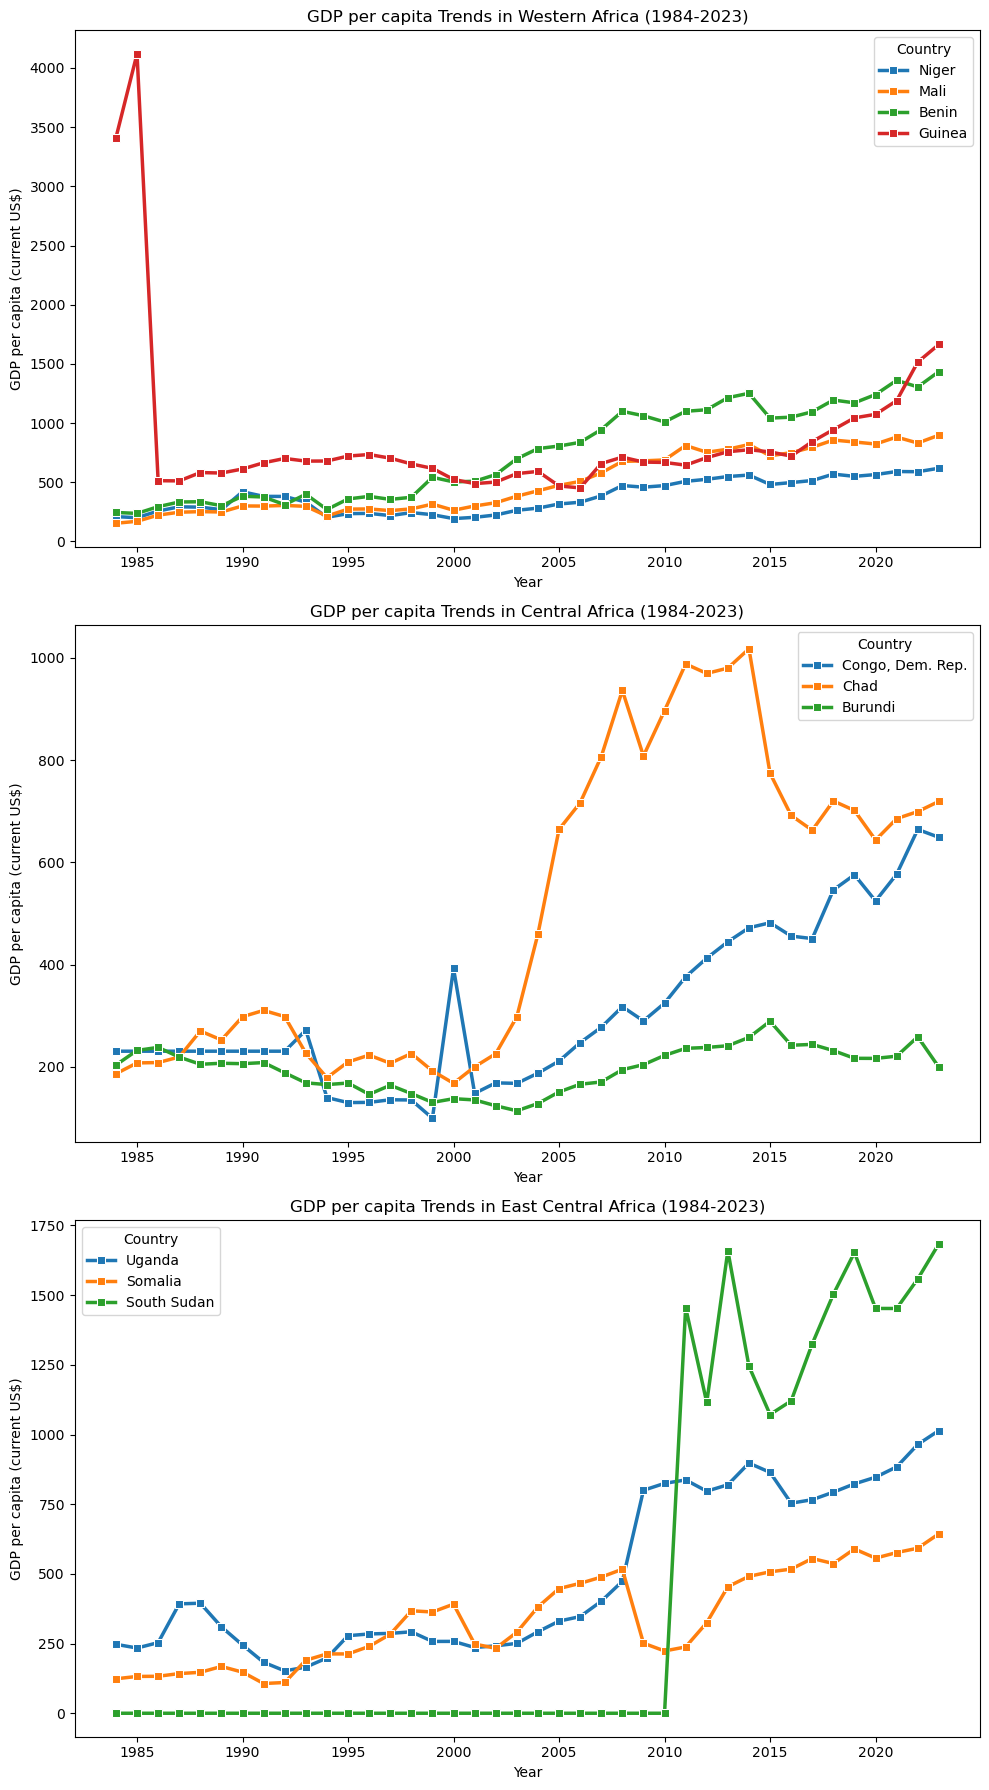

In [92]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot for Western Africa
sns.lineplot(data=df_west_africa, 
             x='Year', 
             y='GDP per capita (current US$)', 
             hue='Country', 
             marker='s',
             linewidth=2.5,
             ax=axs[0])

axs[0].set_title('GDP per capita Trends in Western Africa (1984-2023)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('GDP per capita (current US$)')


# Plot for Central Africa
sns.lineplot(data=df_central_africa, 
             x='Year', 
             y='GDP per capita (current US$)', 
             hue='Country', 
             marker='s', 
             linewidth=2.5, 
             ax=axs[1])

axs[1].set_title('GDP per capita Trends in Central Africa (1984-2023)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GDP per capita (current US$)')


# Plot for East Central Africa
sns.lineplot(data=df_east_central_africa, 
             x='Year', 
             y='GDP per capita (current US$)', 
             hue='Country', 
             marker='s', 
             linewidth=2.5, 
             ax=axs[2])

axs[2].set_title('GDP per capita Trends in East Central Africa (1984-2023)')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('GDP per capita (current US$)')

plt.tight_layout()
plt.show()

- Overall, GDP per capita in these top 10 countries shows an increasing trend. Countries in Central Africa and East Central Africa experienced a significant increase after the year 2000, although GDP per capita remains below $2,000.
- There is a significant drop in GDP per capita in Guinea from 1985 to 1986. It can be attributed to several factors such as political change that Guinea transits from Socialist to Market Economy and economic mismanagment. The sudden policy changes, coupled with the dismantling of the existing socialist economic structures, contributed to economic disruptions and a sharp decline in GDP per capita.

#### 1.3 Inflation Trends

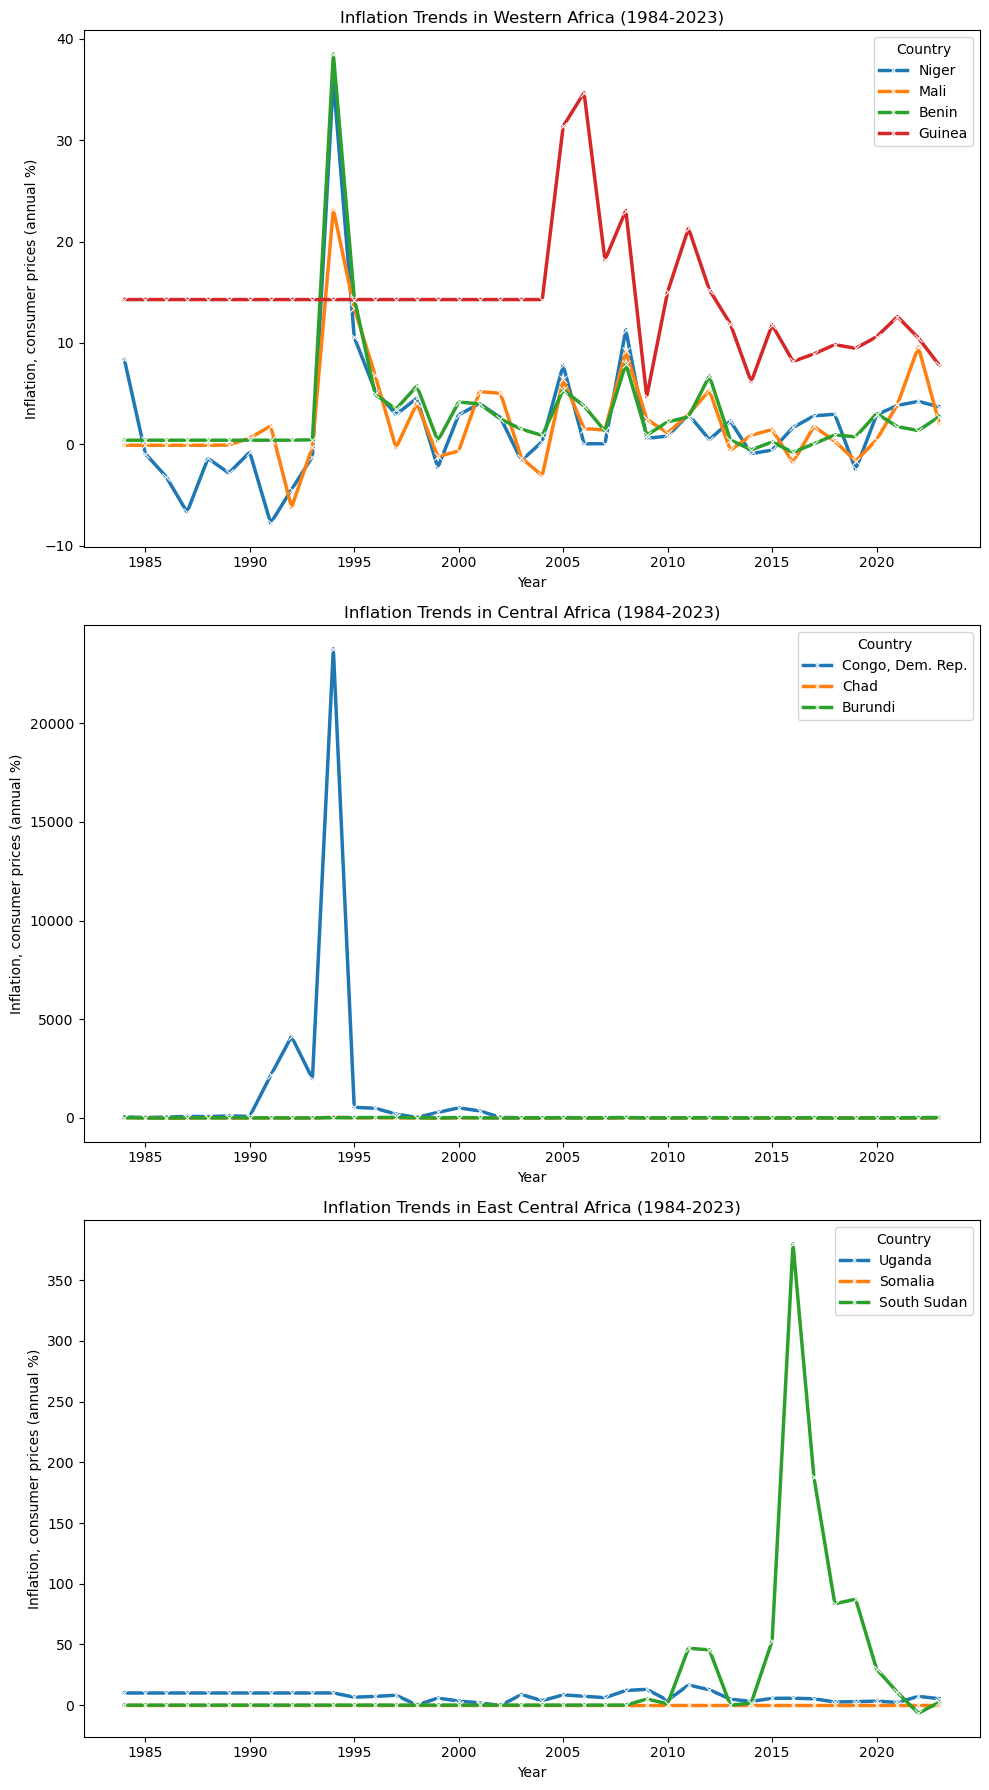

In [95]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot for Western Africa
sns.lineplot(data=df_west_africa, 
             x='Year', 
             y='Inflation, consumer prices (annual %)', 
             hue='Country', 
             marker='x',
             linewidth=2.5,
             ax=axs[0])

axs[0].set_title('Inflation Trends in Western Africa (1984-2023)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Inflation, consumer prices (annual %)')


# Plot for Central Africa
sns.lineplot(data=df_central_africa, 
             x='Year', 
             y='Inflation, consumer prices (annual %)', 
             hue='Country', 
             marker='x', 
             linewidth=2.5, 
             ax=axs[1])

axs[1].set_title('Inflation Trends in Central Africa (1984-2023)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Inflation, consumer prices (annual %)')


# Plot for East Central Africa
sns.lineplot(data=df_east_central_africa, 
             x='Year', 
             y='Inflation, consumer prices (annual %)', 
             hue='Country', 
             marker='x', 
             linewidth=2.5, 
             ax=axs[2])

axs[2].set_title('Inflation Trends in East Central Africa (1984-2023)')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Inflation, consumer prices (annual %)')


plt.tight_layout()
plt.show()

- In 1993, Niger, Mali, Benin, and in 1994, Congo, Dem. Rep experienced high inflation rates in consumer prices, there were part of West and Central African Economic and Monetary Union, which used the CFA franc as their currency. In Jan 1994, a significant devaluation of the CFA franc by 50% occurred. The devaluation led to a sharp increase in the price of imported goods, which heavily affected consumer prices and inflation rates. In addition to the devaluation, these countries faced supply shocks due to poor agricultural production, which further exacerbated inflation.
- In 2016, South Sudan experienced a significant increase in inflation, reaching hyperinflation levels. Since gaining independence in 2011, South Sudan has been plagued by political instability and conflict, a civil war began in 2013, and the ongoing conflict severely disrupted economic activities, including oil production, which is a significant source of revenue for this country.

#### 1.4 Urban Population Trends

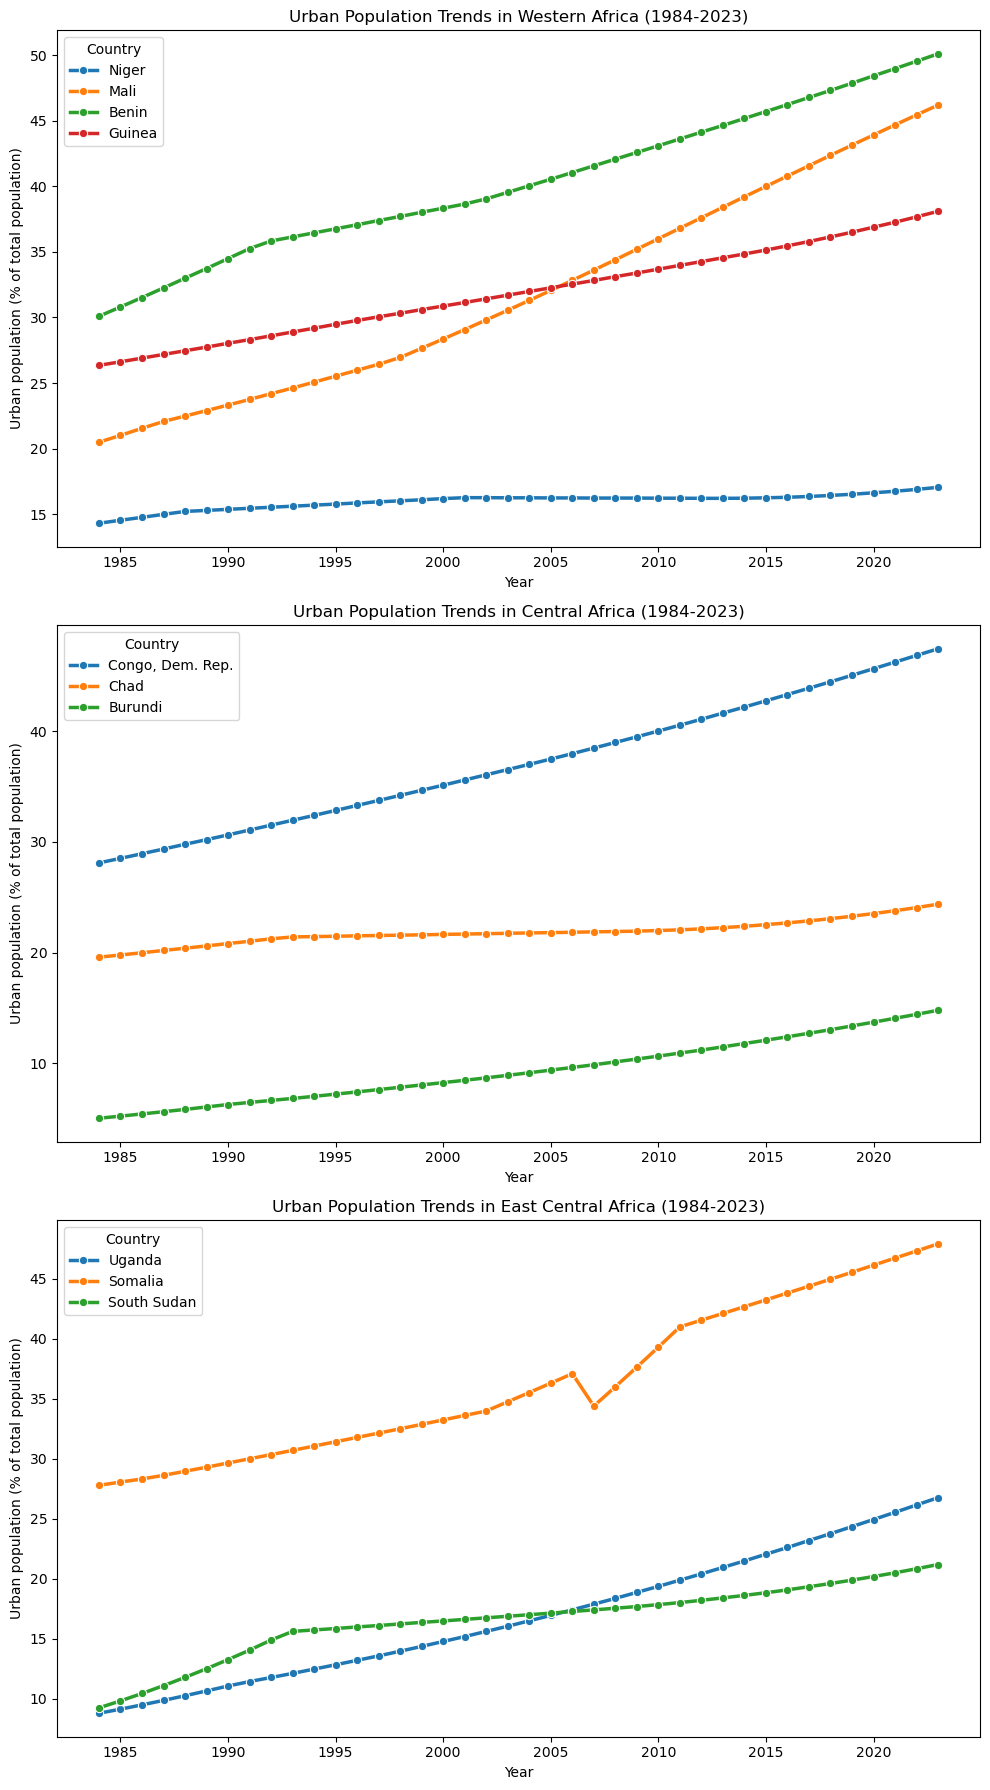

In [98]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot for Western Africa
sns.lineplot(data=df_west_africa, 
             x='Year', 
             y='Urban population (% of total population)', 
             hue='Country', 
             marker='o',
             linewidth=2.5,
             ax=axs[0])

axs[0].set_title('Urban Population Trends in Western Africa (1984-2023)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Urban population (% of total population)')


# Plot for Central Africa
sns.lineplot(data=df_central_africa, 
             x='Year', 
             y='Urban population (% of total population)', 
             hue='Country', 
             marker='o', 
             linewidth=2.5, 
             ax=axs[1])

axs[1].set_title('Urban Population Trends in Central Africa (1984-2023)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Urban population (% of total population)')


# Plot for East Central Africa
sns.lineplot(data=df_east_central_africa, 
             x='Year', 
             y='Urban population (% of total population)', 
             hue='Country', 
             marker='o', 
             linewidth=2.5, 
             ax=axs[2])

axs[2].set_title('Urban Population Trends in East Central Africa (1984-2023)')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Urban population (% of total population)')


plt.tight_layout()
plt.show()

- Overall, Urban Population in these top 10 countries shows an increasing trend, especailly Benin, Congo Dem. Rep., and Somalia will reach 50% of the total population are urban population.

#### 2. Top 10 Countries with lowest fertility rates

In [101]:
df2['Country'].unique()

array(['Korea, Rep.', 'Singapore', 'Ukraine', 'Moldova', 'Puerto Rico',
       'Italy', 'Spain', 'Poland', 'Mauritius', 'Bosnia and Herzegovina'],
      dtype=object)

In [102]:
# Filter the df for East Asia Countries
df_east_asia = df2[df2['Country'].isin(['Korea, Rep.', 'Singapore'])]

# Filter the df for European Countries 
df_europe = df2[df2['Country'].isin(['Ukraine', 'Moldova', 'Italy', 'Spain', 'Poland', 'Bosnia and Herzegovina'])]

# Filter the df for Islands 
df_island = df2[df2['Country'].isin(['Puerto Rico', 'Mauritius'])]

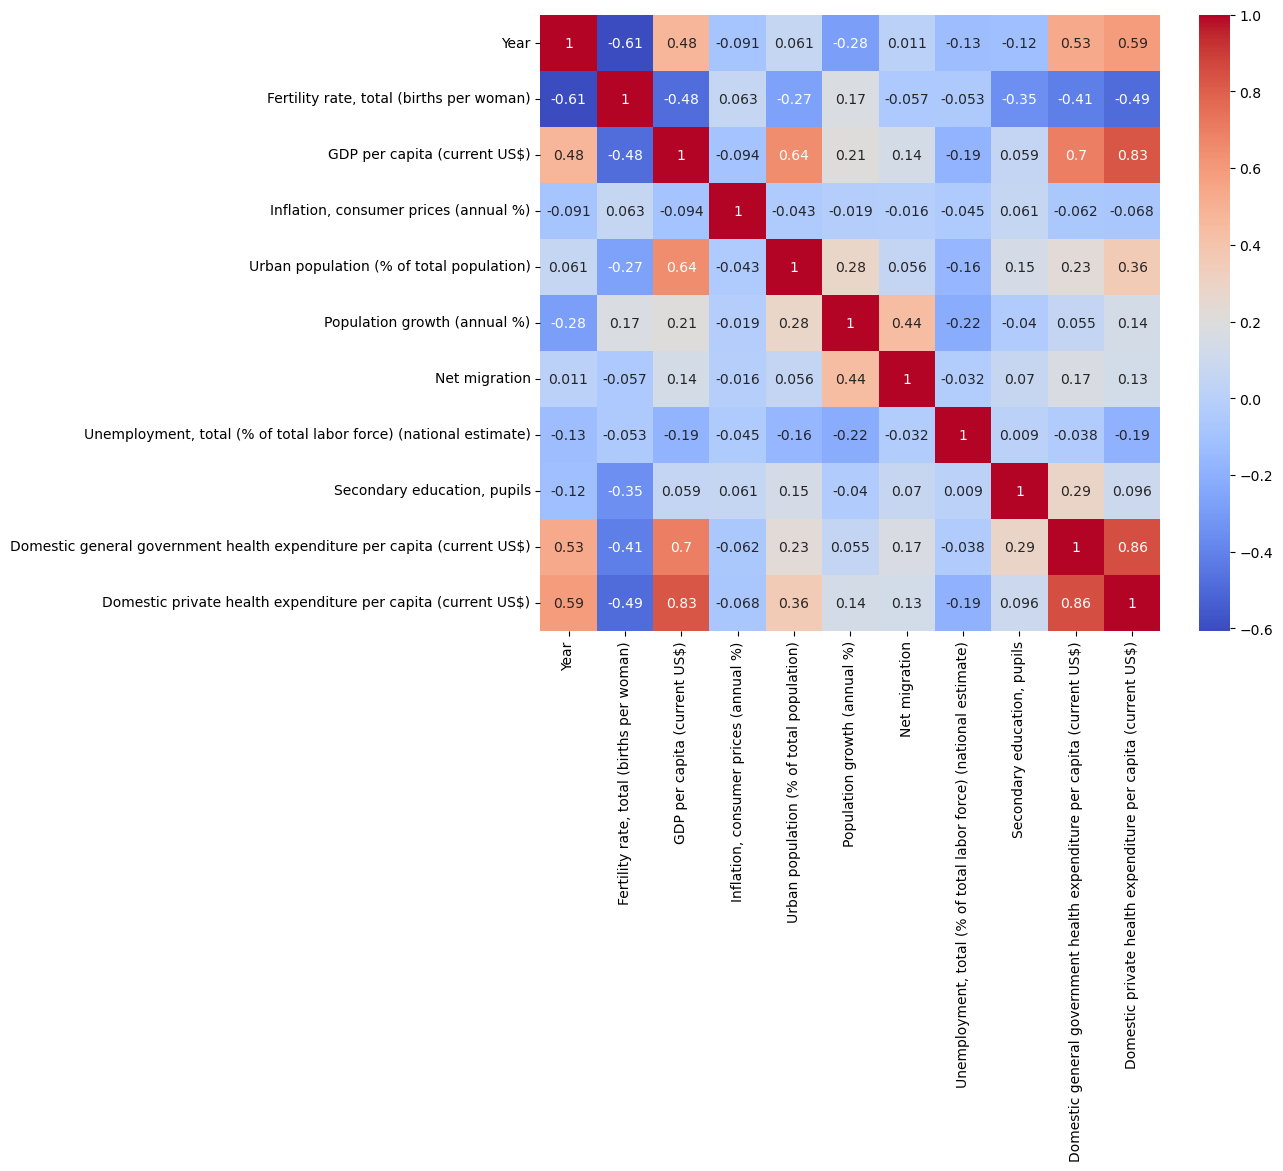

In [103]:
# Correlation heatmap
corr= df2.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

- The Fertility rate has a strong relationship with Year (-0.61), with time goes by, fertility rate goes down.
- The Fertility rate has a moderate negative correlation with GDP per capita, with a coefficient of -0.48.
- The Fertility rate also shows a moderate negative correlation with Health Expenditure, both General health (-0.41) and Private health (-0.49).
- GDP per capita has a strong positive correlation with Urban Population (0.64) and a strong positive correlation with Health Expenditure (General health expenditure: 0.7; Private health expenditure: 0.83).
- Net Migration has a moderate positive correlation with Population Growth, with a coefficient of 0.44.  

#### 2.1 Fertility rate Trends

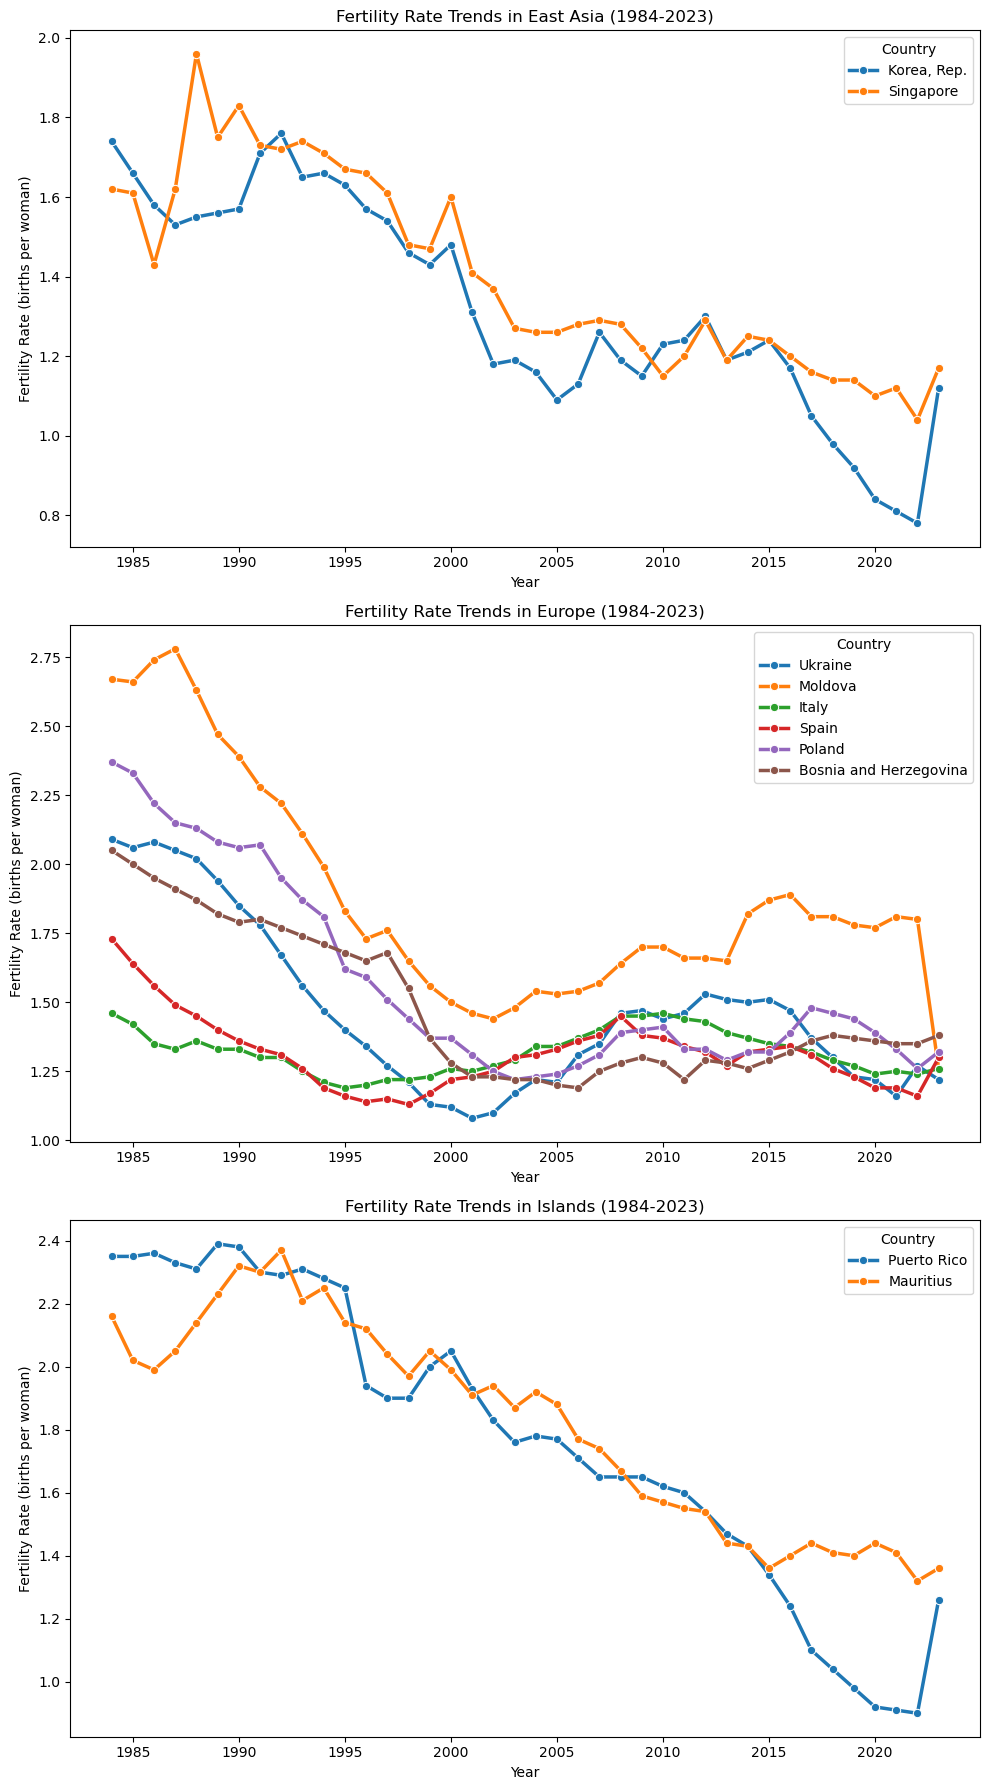

In [106]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))
# Plot for East Asia
sns.lineplot(data=df_east_asia, 
             x='Year', 
             y='Fertility rate, total (births per woman)', 
             hue='Country', 
             marker='o',
             linewidth=2.5,
             ax=axs[0])

axs[0].set_title('Fertility Rate Trends in East Asia (1984-2023)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Fertility Rate (births per woman)')


# Plot for Europe
sns.lineplot(data=df_europe, 
             x='Year', 
             y='Fertility rate, total (births per woman)', 
             hue='Country', 
             marker='o', 
             linewidth=2.5, 
             ax=axs[1])

axs[1].set_title('Fertility Rate Trends in Europe (1984-2023)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Fertility Rate (births per woman)')


# Plot for Island
sns.lineplot(data=df_island, 
             x='Year', 
             y='Fertility rate, total (births per woman)', 
             hue='Country', 
             marker='o', 
             linewidth=2.5, 
             ax=axs[2])

axs[2].set_title('Fertility Rate Trends in Islands (1984-2023)')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Fertility Rate (births per woman)')


plt.tight_layout()
plt.show()

- Overall, the fertility rate in these lowest 10 countries shows a decreasing trend over the past 40 years, with a range of 0.8 to 2.5.  

#### 2.2 GDP per capita Trends

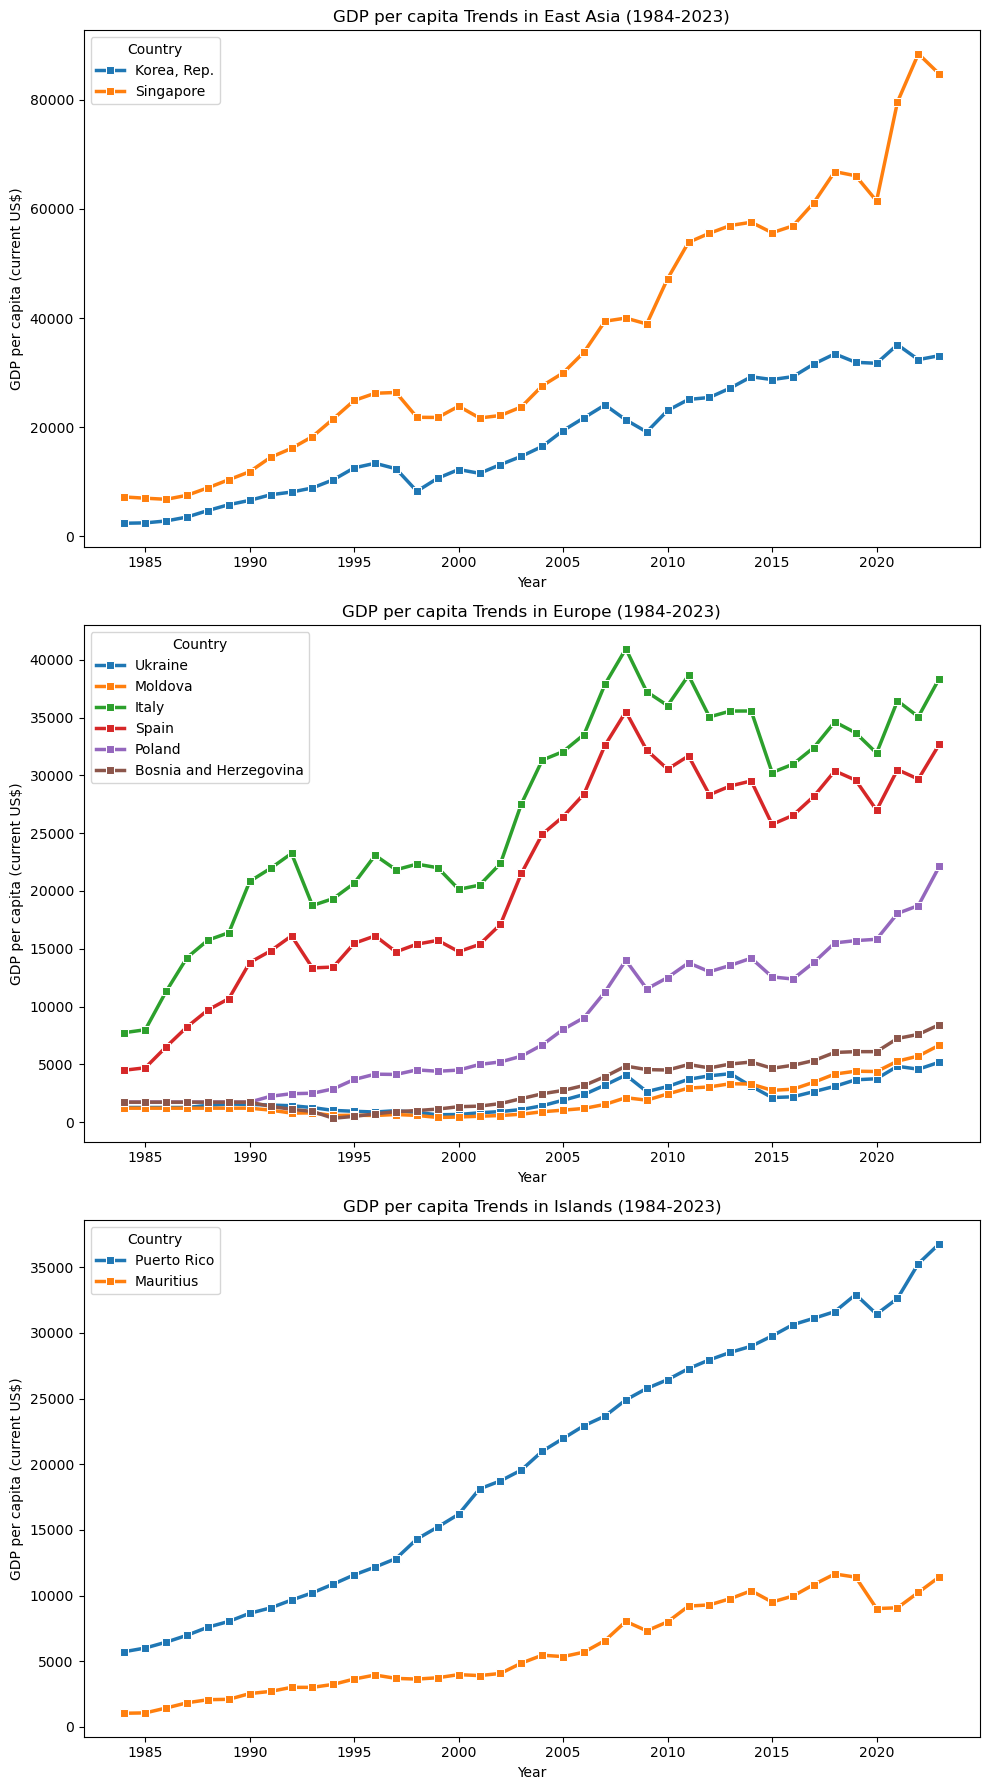

In [109]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot for East Asia
sns.lineplot(data=df_east_asia, 
             x='Year', 
             y='GDP per capita (current US$)', 
             hue='Country', 
             marker='s',
             linewidth=2.5,
             ax=axs[0])

axs[0].set_title('GDP per capita Trends in East Asia (1984-2023)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('GDP per capita (current US$)')


# Plot for Europe
sns.lineplot(data=df_europe, 
             x='Year', 
             y='GDP per capita (current US$)', 
             hue='Country', 
             marker='s', 
             linewidth=2.5, 
             ax=axs[1])

axs[1].set_title('GDP per capita Trends in Europe (1984-2023)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GDP per capita (current US$)')


# Plot for Island
sns.lineplot(data=df_island, 
             x='Year', 
             y='GDP per capita (current US$)', 
             hue='Country', 
             marker='s', 
             linewidth=2.5, 
             ax=axs[2])

axs[2].set_title('GDP per capita Trends in Islands (1984-2023)')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('GDP per capita (current US$)')

plt.tight_layout()
plt.show()

- Overall, GDP per capita in these countries has shown an increasing trend over the past 40 years. Singapore has the highest GDP per capita, reaching 80,000 USD in 2022. Among European countries, Italy and Spain have seen significant growth in GDP per capita, both surpassing 30,000 USD in 2023. This upward trend reflects economic development, increased productivity, and improved standards of living in these countries.
- Puerto Rico has a steady increase in GDP per capita over the past 40 years, and surpassed the increase in Mauritius(an island in Africa). Puerto Rico is a carribean island, and it has attracted significant foreign investment, particularly in the manufacturing and pharmaceutical sectors, also tourism remains a vital part of Puerto Rico's economy, contributing to steady growth.

#### 2.2.1 GDP per capita with Health Expenditure

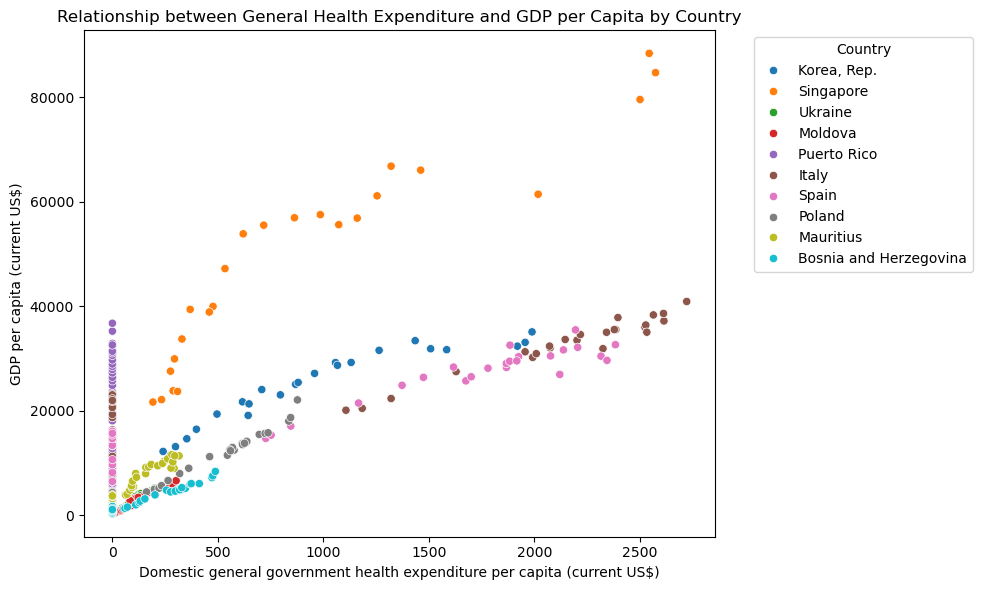

In [112]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df2, x='Domestic general government health expenditure per capita (current US$)', 
             y='GDP per capita (current US$)', 
             hue='Country')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.title('Relationship between General Health Expenditure and GDP per Capita by Country')
plt.tight_layout()
plt.show()

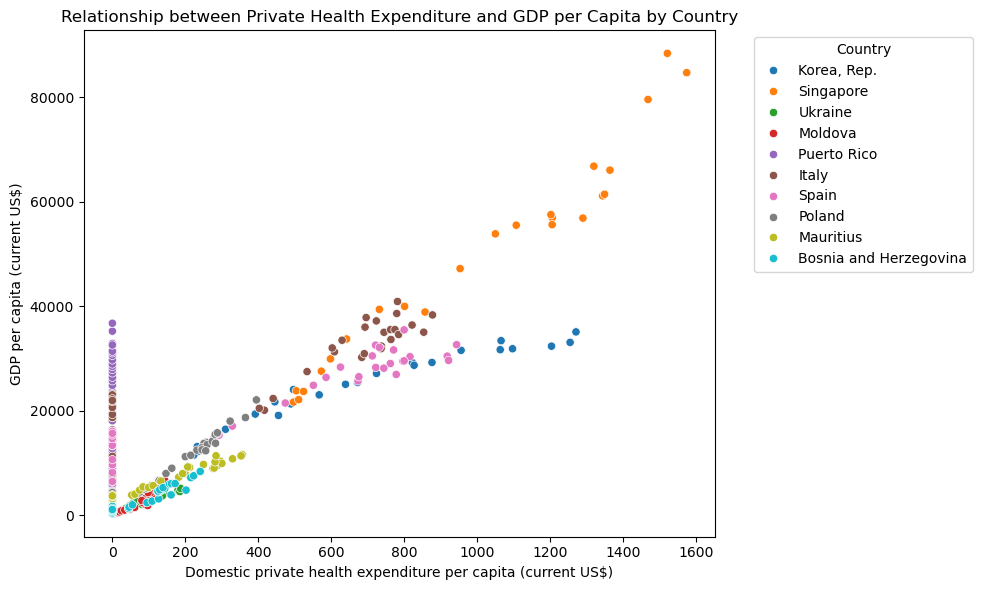

In [113]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df2, x='Domestic private health expenditure per capita (current US$)', 
             y='GDP per capita (current US$)', 
             hue='Country')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.title('Relationship between Private Health Expenditure and GDP per Capita by Country')
plt.tight_layout()
plt.show()

- GDP per capita has a strong linear relationship with health expenditure in these countries, indicating that as a country's wealth increases, it tends to invest more in healthcare. This relationship suggests that countries with higher GDP per capita allocate more resources to improving healthcare infrastructure, services, and access, leading to better health outcomes for their populations.

#### 2.3 Urban Population Trends

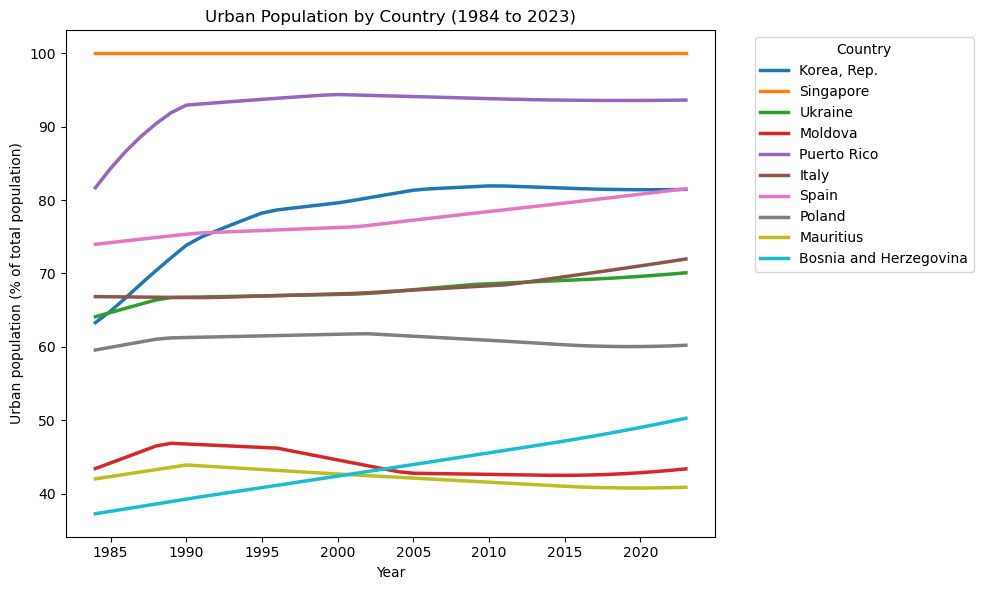

In [116]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df2, 
             x='Year', 
             y='Urban population (% of total population)', 
             hue='Country',
             lw=2.5)

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.title('Urban Population by Country (1984 to 2023)')
plt.tight_layout()
plt.show()

- Most countries have reached a level where 60% or more of their total population resides in urban areas over the past 40 years. However, Moldova, Mauritius, and Bosnia and Herzegovina remain below 50% urbanization. Generally, the GDP per capita in these three countries is below $5,000, which provides additional context for their lower urbanization rates.

### Model Training and Evaluation 

#### 1. Top 10 Countries with highest fertility

In [120]:
# Encode Categorical Column 
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_countries = encoder.fit_transform(df1[['Country']])

encoded_df = pd.DataFrame(encoded_countries, columns=encoder.get_feature_names_out(['Country']))

df1_encoded = pd.concat([df1.drop(columns='Country'), encoded_df], axis=1)

In [121]:
df1_encoded.columns

Index(['Year', 'Fertility rate, total (births per woman)',
       'GDP per capita (current US$)', 'Inflation, consumer prices (annual %)',
       'Urban population (% of total population)',
       'Population growth (annual %)', 'Net migration',
       'Secondary education, pupils',
       'Domestic general government health expenditure per capita (current US$)',
       'Domestic private health expenditure per capita (current US$)',
       'Country_Burundi', 'Country_Chad', 'Country_Congo, Dem. Rep.',
       'Country_Guinea', 'Country_Mali', 'Country_Niger', 'Country_Somalia',
       'Country_South Sudan', 'Country_Uganda'],
      dtype='object')

#### 1.1 Polynomial Regression 

In [123]:
# Separate X and y features

X = df1_encoded.drop('Fertility rate, total (births per woman)', axis=1)
y = df1_encoded['Fertility rate, total (births per woman)']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                 ('model', LinearRegression())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [124]:
# Predict the y values
y_pred_poly = pipe.predict(X_test)

# Obtain the metrics
MAE = mean_absolute_error(y_test, y_pred_poly)
MSE = mean_squared_error(y_test, y_pred_poly)
RMSE = np.sqrt(MSE)
R2_scores = r2_score(y_test, y_pred_poly)

print(f'Mean Absolute Error (MAE): {MAE:.2f}')
print(f'Mean Squared Error (MSE): {MSE:.2f}')
print(f'Root Mean Squared Error (RMSE): {RMSE:.2f}')
print(f'R-squared: {R2_scores:.2f}')

Mean Absolute Error (MAE): 0.18
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.38
R-squared: 0.79


#### 1.2 LassoCV

In [126]:
pipe_lasso = Pipeline([('scaler', StandardScaler()), 
                       ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                       ('lasso_model', LassoCV(eps=0.01, n_alphas=200, cv=5))])
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('lasso_model', LassoCV(cv=5, eps=0.01, n_alphas=200))])

In [127]:
# Predict the y values
y_pred_lasso = pipe_lasso.predict(X_test)

# Obtain the metrics
MAE = mean_absolute_error(y_test, y_pred_lasso)
MSE = mean_squared_error(y_test, y_pred_lasso)
RMSE = np.sqrt(MSE)
R2_scores = r2_score(y_test, y_pred_lasso)

print(f'Mean Absolute Error (MAE): {MAE:.2f}')
print(f'Mean Squared Error (MSE): {MSE:.2f}')
print(f'Root Mean Squared Error (RMSE): {RMSE:.2f}')
print(f'R-squared: {R2_scores:.2f}')

Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20
R-squared: 0.94


#### 2.3 RidgeCV

In [129]:
pipe_ridge = Pipeline([('scaler', StandardScaler()), 
                       ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                       ('ridge_model', RidgeCV((0.01, 0.1, 1.0, 10.0), scoring='neg_mean_absolute_error'))])

pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('ridge_model',
                 RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0),
                         scoring='neg_mean_absolute_error'))])

In [130]:
# Predict the y values
y_pred_ridge = pipe_ridge.predict(X_test)

# Obtain the metrics
MAE = mean_absolute_error(y_test, y_pred_ridge)
MSE = mean_squared_error(y_test, y_pred_ridge)
RMSE = np.sqrt(MSE)
R2_scores = r2_score(y_test, y_pred_ridge)

print(f'Mean Absolute Error (MAE): {MAE:.2f}')
print(f'Mean Squared Error (MSE): {MSE:.2f}')
print(f'Root Mean Squared Error (RMSE): {RMSE:.2f}')
print(f'R-squared: {R2_scores:.2f}')

Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.24
R-squared: 0.92


- Overall, LassoCV has the best metrics, MAE: 0.14, MSE: 0.04, RMSE: 0.20, and R-squared: 0.94, then it will be the final model for predcition.

#### 3. Model Deployment and Prediction

In [133]:
# Dump model 
final_model = Pipeline([('scaler', StandardScaler()),
                        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                        ('lasso_model', LassoCV(eps=0.01, n_alphas=200, cv=5))])
final_model.fit(X, y)

joblib.dump(final_model, 'High_Fertility.pkl')

['High_Fertility.pkl']

In [134]:
# load model
loaded_model_1 = joblib.load('High_Fertility.pkl')

#### Prediction

In [136]:
new_data={'Year': 1984,
          'Country': 'Niger',
          'GDP per capita (current US$)': 209.5318, 
          'Inflation, consumer prices (annual %)': 8.364,
          'Urban population (% of total population)': 14.31,
          'Population growth (annual %)': 3.0168, 
          'Net migration': -9227,
          'Secondary education, pupils': 47188,
          'Domestic general government health expenditure per capita (current US$)': 0,
          'Domestic private health expenditure per capita (current US$)': 0}
new_data_df = pd.DataFrame([new_data])

In [137]:
new_data_encoded = pd.get_dummies(new_data_df, columns=['Country'])
expected_cols = X_train.columns

# Add any missing columns with default values (0)
for col in expected_cols:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0

new_data_encoded = new_data_encoded[expected_cols]

prediction_1 = loaded_model_1.predict(new_data_encoded)

print('The fertility rate of Niger in 1984:', prediction_1)

The fertility rate of Niger in 1984: [7.91809065]


#### 2. Top 10 Countries with lowest fertility rates

In [139]:
# Encode Categorical Column 
encoder_low = OneHotEncoder(drop='first', sparse_output=False)

encoded_countries_low = encoder_low.fit_transform(df2[['Country']])

encoded_df_2 = pd.DataFrame(encoded_countries_low, columns=encoder_low.get_feature_names_out(['Country']))

df2_encoded = pd.concat([df2.drop(columns='Country'), encoded_df_2], axis=1)

In [140]:
df2_encoded.columns

Index(['Year', 'Fertility rate, total (births per woman)',
       'GDP per capita (current US$)', 'Inflation, consumer prices (annual %)',
       'Urban population (% of total population)',
       'Population growth (annual %)', 'Net migration',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Secondary education, pupils',
       'Domestic general government health expenditure per capita (current US$)',
       'Domestic private health expenditure per capita (current US$)',
       'Country_Italy', 'Country_Korea, Rep.', 'Country_Mauritius',
       'Country_Moldova', 'Country_Poland', 'Country_Puerto Rico',
       'Country_Singapore', 'Country_Spain', 'Country_Ukraine'],
      dtype='object')

#### 2.1 Polynomial Regression

In [142]:
# Separate X and y features
X_2 = df2_encoded.drop('Fertility rate, total (births per woman)', axis=1)

y_2 = df2_encoded['Fertility rate, total (births per woman)']

# Train Test Split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                 ('model', LinearRegression())])

pipe.fit(X_train_2, y_train_2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [143]:
# Predict the y values
y_pred_poly_2 = pipe.predict(X_test_2)

# Obtain the metrics
MAE = mean_absolute_error(y_test_2, y_pred_poly_2)
MSE = mean_squared_error(y_test_2, y_pred_poly_2)
RMSE = np.sqrt(MSE)
R2_scores = r2_score(y_test_2, y_pred_poly_2)

print(f'Mean Absolute Error (MAE): {MAE:.2f}')
print(f'Mean Squared Error (MSE): {MSE:.2f}')
print(f'Root Mean Squared Error (RMSE): {RMSE:.2f}')
print(f'R-squared: {R2_scores:.2f}')

Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.39
R-squared: -0.26


#### 2.2 LassoCV

In [145]:
pipe_lasso_2 = Pipeline([('scaler', StandardScaler()), 
                       ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                       ('lasso_model', LassoCV(eps=0.01, n_alphas=500, cv=5))])
pipe_lasso_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('lasso_model', LassoCV(cv=5, eps=0.01, n_alphas=500))])

In [146]:
# Predict the y values
y_pred_lasso_2 = pipe_lasso_2.predict(X_test_2)

# Obtain the metrics
MAE = mean_absolute_error(y_test_2, y_pred_lasso_2)
MSE = mean_squared_error(y_test_2, y_pred_lasso_2)
RMSE = np.sqrt(MSE)
R2_scores = r2_score(y_test_2, y_pred_lasso_2)

print(f'Mean Absolute Error (MAE): {MAE:.2f}')
print(f'Mean Squared Error (MSE): {MSE:.2f}')
print(f'Root Mean Squared Error (RMSE): {RMSE:.2f}')
print(f'R-squared: {R2_scores:.2f}')

Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.16
R-squared: 0.80


#### 2.4 RidgeCV

In [148]:
pipe_ridge_2 = Pipeline([('scaler', StandardScaler()), 
                       ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                       ('ridge_model', RidgeCV((0.01, 0.1, 1.0, 10.0), scoring='neg_mean_absolute_error'))])

pipe_ridge_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('ridge_model',
                 RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0),
                         scoring='neg_mean_absolute_error'))])

In [149]:
# Predict the y values
y_pred_ridge_2 = pipe_ridge_2.predict(X_test_2)

# Obtain the metrics
MAE = mean_absolute_error(y_test_2, y_pred_ridge_2)
MSE = mean_squared_error(y_test_2, y_pred_ridge_2)
RMSE = np.sqrt(MSE)
R2_scores = r2_score(y_test_2, y_pred_ridge_2)

print(f'Mean Absolute Error (MAE): {MAE:.2f}')
print(f'Mean Squared Error (MSE): {MSE:.2f}')
print(f'Root Mean Squared Error (RMSE): {RMSE:.2f}')
print(f'R-squared: {R2_scores:.2f}')

Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12
R-squared: 0.88


- RidgeCV has the best perfomance among these three model, MAE: 0.09, MSE: 0.01, RMSE: 0.12, R2: 0.88.

#### 3. Model Deployment and Prediction

In [152]:
# Get the best alpha
best_alpha = pipe_ridge_2.named_steps['ridge_model'].alpha_
print(best_alpha)

10.0


In [153]:
# Dump model 
final_model_2 = Pipeline([('scaler', StandardScaler()), 
                          ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                          ('ridge_model', RidgeCV((10.0), scoring='neg_mean_absolute_error'))])
final_model_2.fit(X_2, y_2)

joblib.dump(final_model_2, 'low_Fertility.pkl')

['low_Fertility.pkl']

In [154]:
# load model
loaded_model_2 = joblib.load('low_Fertility.pkl')

#### Prediction

In [156]:
new_data_2={'Year': 2017,
          'Country': 'Singapore',
          'GDP per capita (current US$)': 61162.097, 
          'Inflation, consumer prices (annual %)': 0.5763,
          'Urban population (% of total population)': 100,
          'Population growth (annual %)': 0.0886, 
          'Net migration': 35449,
          'Unemployment, total (% of total labor force) (national estimate)': 4.2,
          'Secondary education, pupils': 171319,
          'Domestic general government health expenditure per capita (current US$)': 1254.59,
          'Domestic private health expenditure per capita (current US$)': 1344.706}

new_data_df2 = pd.DataFrame([new_data_2])

In [157]:
new_data_encoded_2 = pd.get_dummies(new_data_df2, columns=['Country'])

expected_cols_2 = X_train_2.columns

# Add any missing columns with default values (0)
for col in expected_cols_2:
    if col not in new_data_encoded_2.columns:
        new_data_encoded_2[col] = 0

new_data_encoded_2 = new_data_encoded_2[expected_cols_2]

prediction_2 = loaded_model_2.predict(new_data_encoded_2)

print('The fertility rate of Singapore in 2017:', prediction_2)

The fertility rate of Singapore in 2017: [1.18571603]


### Time Series Analysis

In [159]:
# Create copy
df_high_copy = df_high.copy()
df_low_copy = df_low.copy()

# Convert 'Year' to datetime type
df_high_copy['Year'] = pd.to_datetime(df_high_copy['Year'], format='%Y')
df_low_copy['Year'] = pd.to_datetime(df_low_copy['Year'], format='%Y')

# Create new high fertility df
df_fertility_high = df_high_copy[['Year', 'Fertility rate, total (births per woman)']]
# Create new low fertility df
df_fertility_low = df_low_copy[['Year', 'Fertility rate, total (births per woman)']]

In [160]:
# Set high fertility column Index
df_fertility_high = df_fertility_high.set_index('Year')

# Set Index freq
df_fertility_high.index = pd.to_datetime(df_fertility_high.index, format='%Y').to_period('Y').to_timestamp()

# Set low fertility column Index
df_fertility_low = df_fertility_low.set_index('Year')

# Set Index freq
df_fertility_low.index = pd.to_datetime(df_fertility_low.index, format='%Y').to_period('Y').to_timestamp()

#### 1. ADF Test and KPSS test

In [162]:
# Functions to perform and interpret ADF and KPSS
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    print('\n')
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    print('\n')
    
    if dfoutput['p-value'] < 0.05:
        print('Strong evidence against the null hypothesis')
        print('We reject the null hypothesis')
        print('Series has no unit root & is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('We fail to reject the null hypothesis')
        print('Series has unit root and is non-stationary')
        
##############################################################
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    print('\n')
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    print('\n')
    
    if kpss_output['p-value'] < 0.05:
        print('Strong evidence against the null hypothesis')
        print('We reject the null hypothesis')
        print('Series has unit root and is non-stationary')
    else:        
        print('Weak evidence against the null hypothesis')
        print('We fail to reject the null hypothesis')
        print('Series has no unit root & is stationary')

In [163]:
# Check stationarity for high fertility

adf_test(df_fertility_high['Fertility rate, total (births per woman)'])
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
kpss_test(df_fertility_high['Fertility rate, total (births per woman)'])

Results of Dickey-Fuller Test:


Test Statistic                  -3.306058
p-value                          0.014610
#Lags Used                       0.000000
Number of Observations Used    399.000000
Critical Value (1%)             -3.446846
Critical Value (5%)             -2.868811
Critical Value (10%)            -2.570643
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has no unit root & is stationary
~~~~~~~~~~~~~~~~~~~~~~~~~~
Results of KPSS Test:


Test Statistic            0.521448
p-value                   0.036836
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has unit root and is non-stationary


In [164]:
# Check stationarity for low fertility
adf_test(df_fertility_low['Fertility rate, total (births per woman)'])
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
kpss_test(df_fertility_low['Fertility rate, total (births per woman)'])

Results of Dickey-Fuller Test:


Test Statistic                  -4.251506
p-value                          0.000538
#Lags Used                       0.000000
Number of Observations Used    399.000000
Critical Value (1%)             -3.446846
Critical Value (5%)             -2.868811
Critical Value (10%)            -2.570643
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has no unit root & is stationary
~~~~~~~~~~~~~~~~~~~~~~~~~~
Results of KPSS Test:


Test Statistic            0.120088
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has no unit root & is stationary


C:\Users\Zixian Ye\AppData\Local\Temp\ipykernel_25848\1540590298.py:35: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


#### 2. Auto Arima

In [166]:
# Train Test Split
train_high = df_fertility_high.iloc[:319]
test_high = df_fertility_high.iloc[319:]

train_low = df_fertility_low.iloc[:319]
test_low= df_fertility_low.iloc[319:]

In [167]:
# Get the best model value via auto_arima
auto_res_high = auto_arima(train_high['Fertility rate, total (births per woman)'],
                           seasonal=False,
                           trace=True)
auto_res_high.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=131.136, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2125.811, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1712.161, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=129.207, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=127.457, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=129.294, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=120.132, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=513.922, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=118.331, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=801.229, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=120.110, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  319
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -56.165
Date:                Thu, 29 Aug 2024   AIC                            118.331
Time:                        17:14:03   BIC                            129.626
Sample:                             0   HQIC                           122.842
                                - 319                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3221      0.193      1.673      0.094      -0.055       0.700
ar.L1          0.9515      0.030     31.422      0.000       0.892       1.011
sigma2         0.0826      0.004     23.031      0.000       0.076       0.090
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):             15097.11
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               3.63   Skew:                             4.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
auto_res_low = auto_arima(train_low['Fertility rate, total (births per woman)'],
                           seasonal=False,
                           trace=True)
auto_res_low.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-263.936, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1186.676, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=797.584, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-265.955, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=509.810, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-267.891, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-284.333, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1.508, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-285.292, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=268.411, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-284.473, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-282.167, Ti

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  319
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 145.646
Date:                Thu, 29 Aug 2024   AIC                           -285.292
Time:                        17:14:06   BIC                           -273.996
Sample:                             0   HQIC                          -280.781
                                - 319                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1397      0.057      2.433      0.015       0.027       0.252
ar.L1          0.9072      0.037     24.514      0.000       0.835       0.980
sigma2         0.0234      0.001     29.171      0.000       0.022       0.025
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):             22740.68
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             5.34
Prob(H) (two-sided):                  0.36   Kurtosis:                        42.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Summary**
- High Fertility's Best Model: Arima (p=0, d=1, q=0).
 - When both 'p=0' and 'q=0', the model does not use past observations to predict future values. While d= 1, the model predicts the next value will be the same as the previous value plus a constant drift term.
- Low Fertility's Best Model: Arima (p=1, d=0, q=0)

#### 3. Model Evaluation

In [171]:
# Predictions on Test sets
pred_high = auto_res_high.predict(n_periods=len(test_high))

pred_low = auto_res_low.predict(n_periods=len(test_low))

D:\Zixian Ye\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Zixian Ye\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\Zixian Ye\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Zixian Ye\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [172]:
# Calculate RMSE and MSE on high fertility
mse_high = mean_squared_error(test_high['Fertility rate, total (births per woman)'], pred_high)
rmse_high = np.sqrt(mse_high)

# Calculate RMSE and MSE on low fertility
mse_low = mean_squared_error(test_low['Fertility rate, total (births per woman)'], pred_low)
rmse_low = np.sqrt(mse_low)

print(f'High Fertility Countries - RMSE: {rmse_high:.2f}, MSE: {mse_high:.2f}')
print('\n')
print(f'Low Fertility Countries - RMSE: {rmse_low:.2f}, MSE: {mse_low:.2f}')

High Fertility Countries - RMSE: 1.32, MSE: 1.73


Low Fertility Countries - RMSE: 0.41, MSE: 0.17


In [173]:
print('Test Mean on High Fertility: ', test_high.mean())
print('Prediction Mean on High Fertility: ', pred_high.mean())

print('\n')

print('Test Mean on Low Fertility: ', test_low.mean())
print('Prediction Mean on Low Fertility: ', pred_low.mean())

Test Mean on High Fertility:  Fertility rate, total (births per woman)    6.097531
dtype: float64
Prediction Mean on High Fertility:  6.091068454814302


Test Mean on Low Fertility:  Fertility rate, total (births per woman)    1.645185
dtype: float64
Prediction Mean on Low Fertility:  1.4756198576358306


- The model performs better in predicting low fertility countries, as indicated by the lower RMSE and MSE.
- The model on high fertility countries shows 'p=0' and 'q=0', which means it doesn't use past values to predict future values.

#### 4. Model Predictions in next decade

In [176]:
# Forecast the next 10 years for high fertility rates
forecast_high = auto_res_high.predict(n_periods=10)

# Convert the last index to a datetime object and create a date range for the next 10 years
last_year_high = pd.to_datetime(df_fertility_high.index[-1], format='%Y')

years_high = pd.date_range(start=last_year_high + pd.offsets.YearBegin(),
                           periods=10, freq='YS')

# Combine the forecasted values with the corresponding years
forecast_df_high = pd.DataFrame({'Year': years_high, 
                                 'Predicted_Fertility': forecast_high})
forecast_df_high.set_index('Year', inplace=True)


# Forecast the next 10 years for low fertility rates
forecast_low = auto_res_low.predict(n_periods=10)

# Convert the last index to a datetime object and create a date range for the next 10 years
last_year_low = pd.to_datetime(df_fertility_low.index[-1], format='%Y')

years_low = pd.date_range(start=last_year_low + pd.offsets.YearBegin(),
                          periods=10, freq='YS')

# Combine the forecasted values with the corresponding years
forecast_df_low = pd.DataFrame({'Year': years_low, 
                                'Predicted_Fertility': forecast_low})

forecast_df_low.set_index('Year', inplace=True)

# Display the forecasts
print('Fertility Rate Forecast for High Fertility Countries (Next 10 Years):')
print(forecast_df_high)
print('\n')
print('Fertility Rate Forecast for Low Fertility Countries (Next 10 Years):')
print(forecast_df_low)

Fertility Rate Forecast for High Fertility Countries (Next 10 Years):
            Predicted_Fertility
Year                           
2024-01-01             4.451495
2025-01-01             4.557578
2026-01-01             4.658513
2027-01-01             4.754548
2028-01-01             4.845922
2029-01-01             4.932861
2030-01-01             5.015580
2031-01-01             5.094284
2032-01-01             5.169169
2033-01-01             5.240418


Fertility Rate Forecast for Low Fertility Countries (Next 10 Years):
            Predicted_Fertility
Year                           
2024-01-01             1.282755
2025-01-01             1.303399
2026-01-01             1.322127
2027-01-01             1.339116
2028-01-01             1.354529
2029-01-01             1.368512
2030-01-01             1.381197
2031-01-01             1.392705
2032-01-01             1.403145
2033-01-01             1.412616


D:\Zixian Ye\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Zixian Ye\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\Zixian Ye\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Zixian Ye\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## The End!